Importing Library

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')

Loading the dataset

In [ ]:
pd.read_sql_query(
    "SELECT type, name FROM sqlite_master WHERE type IN ('table','view') ORDER BY type, name;",
    conj
)

,type,name
0,table,begin_inventory
1,table,end_inventory
2,table,purchase_prices
3,table,purchases
4,table,sales
5,table,vendor_invoice
6,table,vendor_sales_summary


In [8]:
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.head()


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


In [2]:
import pandas as pd
import sqlite3
import pandas as pd

# connect to your database file
conn = sqlite3.connect("inventory.db")  # adjust path if needed

# then run your query
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)

# show descriptive stats like your right picture
display(df.describe())


,VendorNumber,Brand,TotalPurchaseQuantity,TotalPurchaseDollars,PurchasePrice,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,Volume,ActualPrice,FreightCost,GrossProfit,ProfitMargin
count,11460.000000,11460.000000,10699.000000,1.069900e+04,10699.000000,11277.000000,1.127700e+04,1.127700e+04,11277.000000,11277.000000,11457.000000,1.146000e+04,11277.000000
mean,10711.366230,18070.617627,3139.020189,3.008700e+04,24.383592,2919.027756,4.008716e+04,4.008716e+04,844.255210,34.727173,61260.142797,1.135796e+04,-8.009013
std,18821.779022,12626.698931,11091.078020,1.230286e+05,109.236900,10685.836505,1.635082e+05,1.635082e+05,674.134671,132.071992,60931.477381,4.475273e+04,432.845349
min,2.000000,58.000000,1.000000,0.000000e+00,0.000000,1.000000,9.800000e-01,9.800000e-01,50.000000,0.490000,0.090000,-5.200278e+04,-23730.638953
25%,3960.000000,5928.000000,36.000000,4.527150e+02,6.840000,26.000000,5.756400e+02,5.756400e+02,750.000000,10.490000,14069.870000,5.399750e+01,17.846791
50%,7153.000000,18848.500000,262.000000,3.650240e+03,10.450000,198.000000,4.306050e+03,4.306050e+03,750.000000,15.932857,50293.620000,1.069960e+03,31.838631
75%,9552.000000,25296.500000,1976.500000,2.072748e+04,19.495000,1728.000000,2.562546e+04,2.562546e+04,750.000000,28.990000,79528.990000,7.599700e+03,44.989216
max,201359.000000,90631.000000,337660.000000,3.811252e+06,5681.810000,334939.000000,5.101920e+06,5.101920e+06,20000.000000,5799.990000,257032.070000,1.290668e+06,100.000000


Exploratory Data Analysis

-Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

-In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with futher analysis.


In [10]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,10.0,28.100,27.448740,1.00,2.0000,30.00,34.0000,76.00
Brand,10.0,5079.500,2017.657126,2034.00,3894.7500,5059.00,5255.0000,8412.00
VendorNumber,10.0,1629.100,1960.990931,105.00,480.0000,480.00,3469.5000,4466.00
PONumber,10.0,8123.400,21.469358,8106.00,8106.0000,8115.00,8137.0000,8169.00
PurchasePrice,10.0,15.164,9.611920,2.87,9.3500,11.95,20.7125,35.71
Quantity,10.0,12.000,13.888444,4.00,5.0000,6.00,10.5000,48.00
Dollars,10.0,118.279,60.608007,37.40,65.6875,120.44,164.8500,214.26
Classification,10.0,1.000,0.000000,1.00,1.0000,1.00,1.0000,1.00


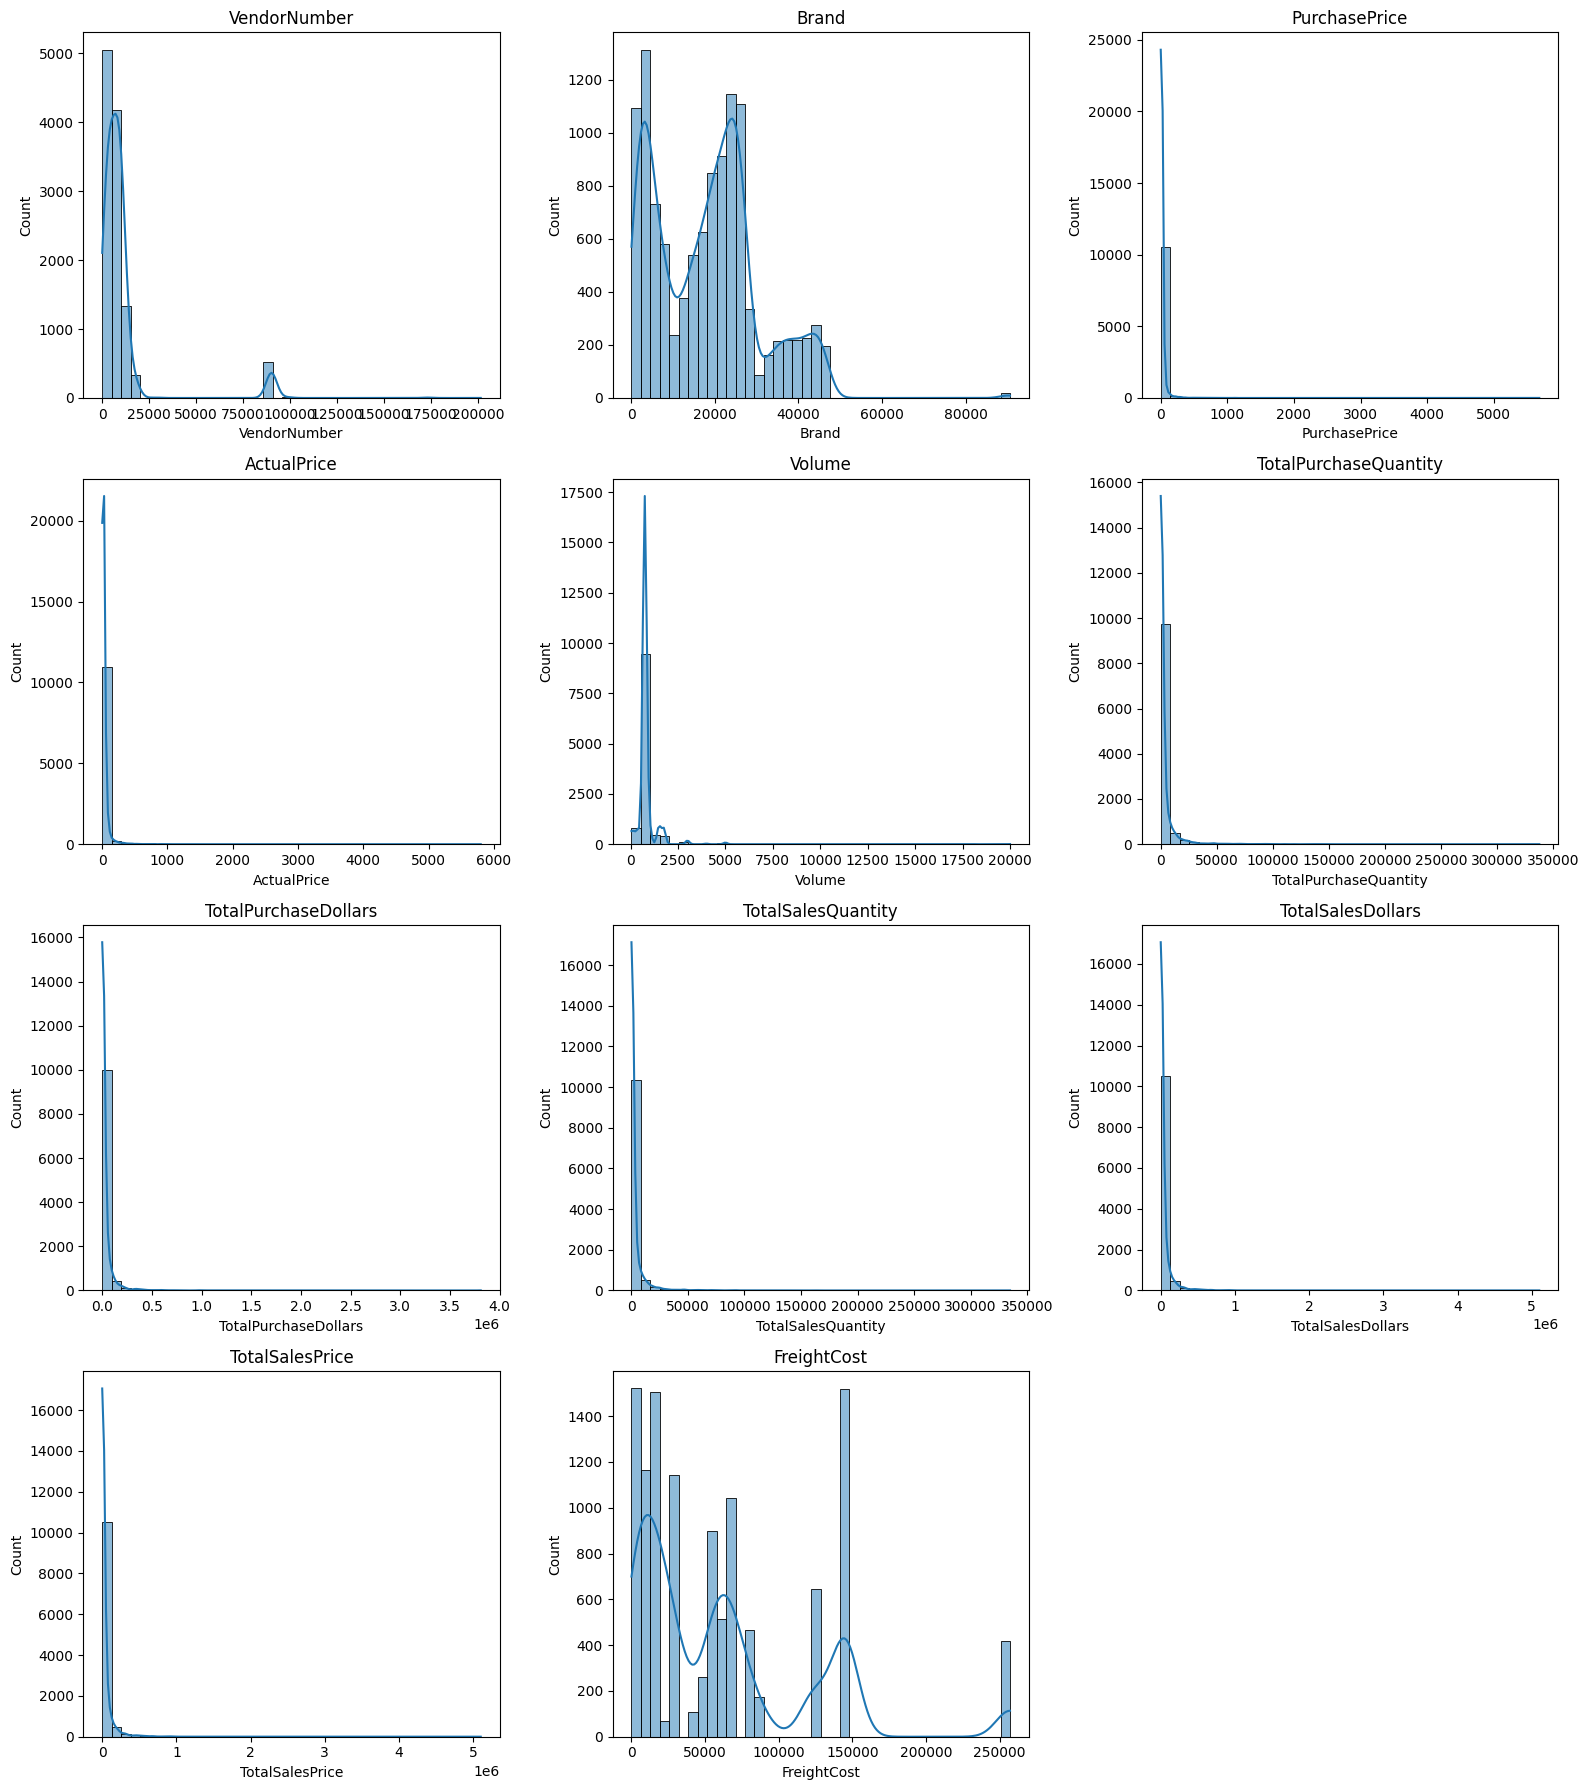

In [ ]:

# 1) Use the aggregated table
import sqlite3, pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect("Inventory.db")
vss = pd.read_sql_query("SELECT * FROM vendor_sales_summary;", conn)

# 2) Columns to plot
wanted = [
    "VendorNumber","Brand","PurchasePrice","ActualPrice","Volume",
    "TotalPurchaseQuantity","TotalPurchaseDollars",
    "TotalSalesQuantity","TotalSalesDollars","TotalSalesPrice",
    "TotalExciseTax","FreightCost"
]
cols = [c for c in wanted if c in vss.columns]

# 3) Convert to numeric (some are strings)
for c in cols:
    vss[c] = pd.to_numeric(vss[c], errors="coerce")

# 4) Plot histograms in a 3xN grid
n = len(cols)
ncols = 3
nrows = int(np.ceil(n / ncols))

plt.figure(figsize=(16, 4.5*nrows))
for i, c in enumerate(cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(vss[c].dropna(), kde=True, bins=40)
    plt.title(c)
    plt.xlabel(c)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()


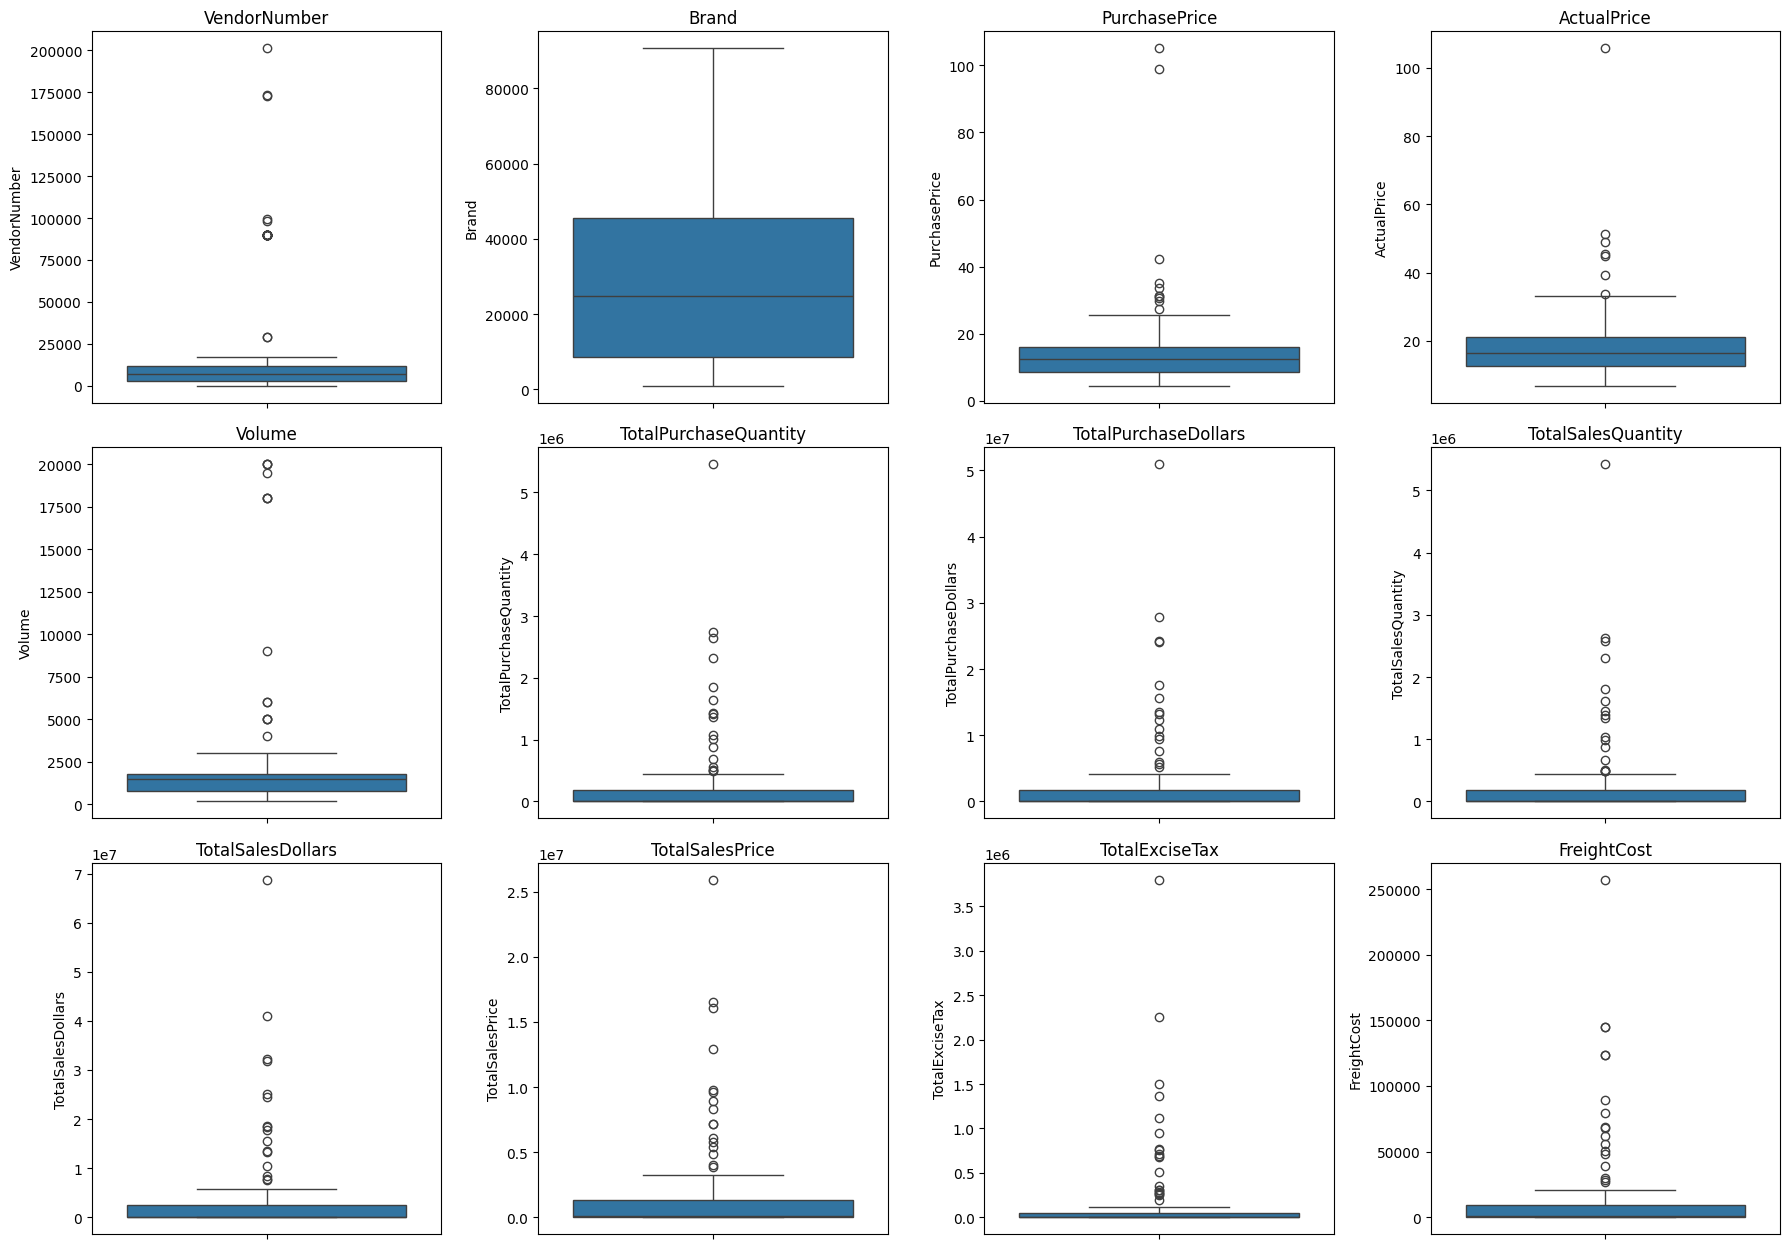

In [4]:
import math
import sqlite3, pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load the aggregated table
conn = sqlite3.connect("Inventory.db")
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary;", conn)

# 2) Columns the video shows (we'll plot the ones that actually exist)
wanted = [
    "VendorNumber","Brand","PurchasePrice","ActualPrice","Volume",
    "TotalPurchaseQuantity","TotalPurchaseDollars",
    "TotalSalesQuantity","TotalSalesDollars","TotalSalesPrice",
    "TotalExciseTax","FreightCost"
]

# Derive ActualPrice if missing (avg selling price)
if "ActualPrice" not in df.columns and {"TotalSalesPrice","TotalSalesQuantity"}.issubset(df.columns):
    df["ActualPrice"] = np.where(
        df["TotalSalesQuantity"].fillna(0).eq(0),
        np.nan,
        df["TotalSalesPrice"] / df["TotalSalesQuantity"]
    )

# Keep only present columns and coerce to numeric
numerical_cols = [c for c in wanted if c in df.columns]
for c in numerical_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# 3) Plot boxplots (vertical, 4 per row like the screenshot)
ncols = 4
nrows = math.ceil(len(numerical_cols) / ncols)

plt.figure(figsize=(18, 4.2 * nrows))
for i, col in enumerate(numerical_cols, start=1):
    ax = plt.subplot(nrows, ncols, i)
    sns.boxplot(y=df[col].dropna(), ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel(col)
plt.tight_layout()
plt.show()


**Summary Statistics nsights**

-Negative & Zero Values

1.Zero sales metrics: Both TotalSalesQuantity and TotalSalesDollars show heavy mass at 0. That implies many vendor–SKU combos were purchased but didn’t sell in the period (slow-moving or obsolete stock), or sales weren’t recorded for those lines.

2.Zero purchase metrics: A cluster at 0 for TotalPurchaseQuantity/Dollars indicates items that sold without a matching purchase in-window (older inventory, dropship, or data gaps).

3.Pricing zeros: If any 0 values appear for PurchasePrice or ActualPrice, they’re data quality flags (missing price, returns netting to zero, or unit mismatch).

-Outliers & Spread

1.Prices (PurchasePrice, ActualPrice): Tight center around low double-digits with a long right tail and clear outliers (high-priced premium items or mis-keyed decimals). These points will dominate models unless capped or transformed.

2.Dollar totals (TotalPurchaseDollars, TotalSalesDollars, TotalSalesPrice): Extremely right-skewed with rare, very large transactions—likely bulk buys, seasonal spikes, or key accounts. A log scale or winsorization is recommended for analysis.

3.Quantities (TotalPurchaseQuantity, TotalSalesQuantity): Heavy right tail with many small transactions and a few very large ones. Those large points deserve review (promotions, case vs. unit counting, or one-off deals).

4.FreightCost: Very wide spread with many small/zero shipments and occasional huge spikes. That pattern is typical of LTL vs. FTL shipments or consolidated loads; spikes may signal inefficiencies or surcharges.

5.Volume/Size: Mostly small pack sizes with a few very large ones. Consider normalizing monetary metrics per liter/ounce to compare fairly across products.

6.Brand / VendorNumber: Distributions are highly concentrated with a few extreme codes, suggesting a long-tail vendor and brand mix (many small vendors, a few dominant ones).

**Business Takeaways**

1.Inventory risk: High counts at zero sales with non-zero purchases suggest carrying cost and potential write-downs. Prioritize aging analysis and markdown strategy.

2.Logistics optimization: Freight spikes warrant a shipment review—consider consolidation, carrier renegotiation, or min-order thresholds.

3.Vendor management: Long-tail vendors contribute minimal volume but add operational complexity. Consider rationalization or different service levels.

In [ ]:
import os, sqlite3, pandas as pd, numpy as np

conn = sqlite3.connect(os.path.abspath("Inventory.db"))

# --- Load & normalize
sales = pd.read_sql_query("""
  SELECT InventoryId, VendorNo AS VendorNumber, VendorName,
         Brand, Description, Size, Volume,
         SalesQuantity, SalesDollars, SalesPrice
  FROM sales;
""", conn)

purch = pd.read_sql_query("""
  SELECT InventoryId, VendorNumber, VendorName,
         Brand, Description, Size,
         Quantity AS PurchaseQuantity, Dollars AS PurchaseDollars, PurchasePrice
  FROM purchases;
""", conn)

# Common SKU key like in the video
KEY = ["VendorNumber","VendorName","Brand","Description","Size"]

# --- Aggregate SALES to SKU
s = sales.copy()
s["Price_x_Qty"] = pd.to_numeric(s["SalesPrice"], errors="coerce") * pd.to_numeric(s["SalesQuantity"], errors="coerce")
sales_agg = (s.groupby(KEY, dropna=False)
               .agg(TotalSalesQuantity=("SalesQuantity","sum"),
                    TotalSalesDollars =("SalesDollars","sum"),
                    TotalSalesPrice   =("Price_x_Qty","sum"),
                    Volume            =("Volume","max"))
               .reset_index())
sales_agg["ActualPrice"] = np.where(
    sales_agg["TotalSalesQuantity"].fillna(0).eq(0), np.nan,
    sales_agg["TotalSalesPrice"]/sales_agg["TotalSalesQuantity"]
)

# --- Aggregate PURCHASES to SKU
purch_agg = (purch.groupby(KEY, dropna=False)
               .agg(TotalPurchaseQuantity=("PurchaseQuantity","sum"),
                    TotalPurchaseDollars =("PurchaseDollars","sum"),
                    PurchasePrice        =("PurchasePrice","mean"))
               .reset_index())

# --- Combine to SKU-level summary
vss = (purch_agg.merge(sales_agg, on=KEY, how="outer"))

# freight by vendor
try:
    vinv = pd.read_sql_query("SELECT VendorNumber, SUM(Freight) AS FreightCost FROM vendor_invoice GROUP BY VendorNumber;", conn)
    vss = vss.merge(vinv, on="VendorNumber", how="left")
except Exception:
    vss["FreightCost"] = np.nan

# --- Metrics like the video
for c in ["TotalSalesDollars","TotalPurchaseDollars","TotalSalesQuantity","TotalPurchaseQuantity"]:
    if c not in vss.columns: vss[c] = 0
vss["GrossProfit"]  = vss["TotalSalesDollars"].fillna(0) - vss["TotalPurchaseDollars"].fillna(0)
vss["ProfitMargin"] = np.where(
    vss["TotalSalesDollars"].fillna(0).eq(0), np.nan,
    100 * vss["GrossProfit"]/vss["TotalSalesDollars"]
)

# Save/replace the table exactly like the video
rows = vss.to_sql("vendor_sales_summary", conn, if_exists="replace", index=False)
conn.commit()
print("Rows written (SKU grain):", rows)

# Filter the table
sql = """
SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
  AND ProfitMargin > 0
  AND COALESCE(TotalSalesQuantity,0) > 0
"""
df = pd.read_sql_query(sql, conn)
print("Filtered shape:", df.shape)   # should drop dramatically from 272k
df.head()




Rows written (SKU grain): 11460
Filtered shape: (9327, 16)


,VendorNumber,VendorName,Brand,Description,Size,TotalPurchaseQuantity,TotalPurchaseDollars,PurchasePrice,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,Volume,ActualPrice,FreightCost,GrossProfit,ProfitMargin
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,750mL,8.0,190.88,23.86,18.0,665.82,665.82,750.0,36.99,27.08,474.94,71.331591
1,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,750mL,39.0,446.16,11.44,47.0,704.53,704.53,750.0,14.99,367.52,258.37,36.672675
2,105,ALTAMAR BRANDS LLC,2529,Right Gin,750mL,12.0,279.00,23.25,12.0,359.88,359.88,750.0,29.99,62.39,80.88,22.474158
3,105,ALTAMAR BRANDS LLC,8412,Tequila Ocho Plata Fresno,750mL,320.0,11427.20,35.71,307.0,15346.93,15346.93,750.0,49.99,62.39,3919.73,25.540808
4,105,ALTAMAR BRANDS LLC,8419,Ocho Tequila Plata Corrales,100mL,NaN,NaN,NaN,6.0,41.94,41.94,100.0,6.99,62.39,41.94,100.000000


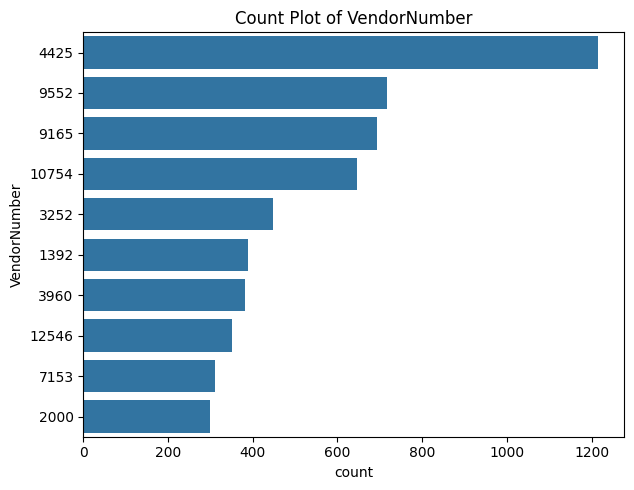

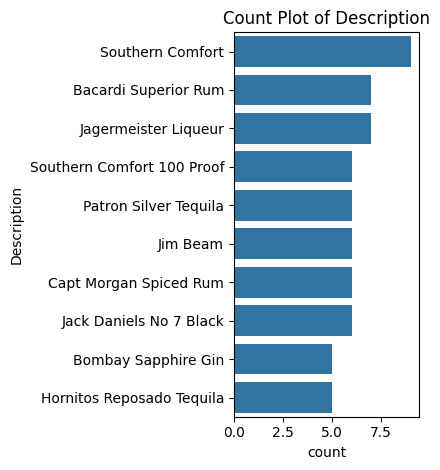

In [13]:
# Count Plots for categorical columns
categorical_cols = ['VendorNumber', 'Description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count Plot of {col}")
    plt.tight_layout()
    plt.show()

Numeric cols kept: ['VendorNumber', 'Brand', 'TotalPurchaseQuantity', 'TotalPurchaseDollars', 'PurchasePrice', 'TotalSalesQuantity', 'TotalSalesDollars', 'TotalSalesPrice', 'Volume', 'ActualPrice', 'FreightCost', 'GrossProfit', 'ProfitMargin']
Rows: 11460 | NaN % per col:
 VendorNumber             0.000
Brand                    0.000
TotalPurchaseQuantity    0.066
TotalPurchaseDollars     0.066
PurchasePrice            0.066
TotalSalesQuantity       0.016
TotalSalesDollars        0.016
TotalSalesPrice          0.016
Volume                   0.016
ActualPrice              0.016
FreightCost              0.000
GrossProfit              0.000
ProfitMargin             0.016
dtype: float64


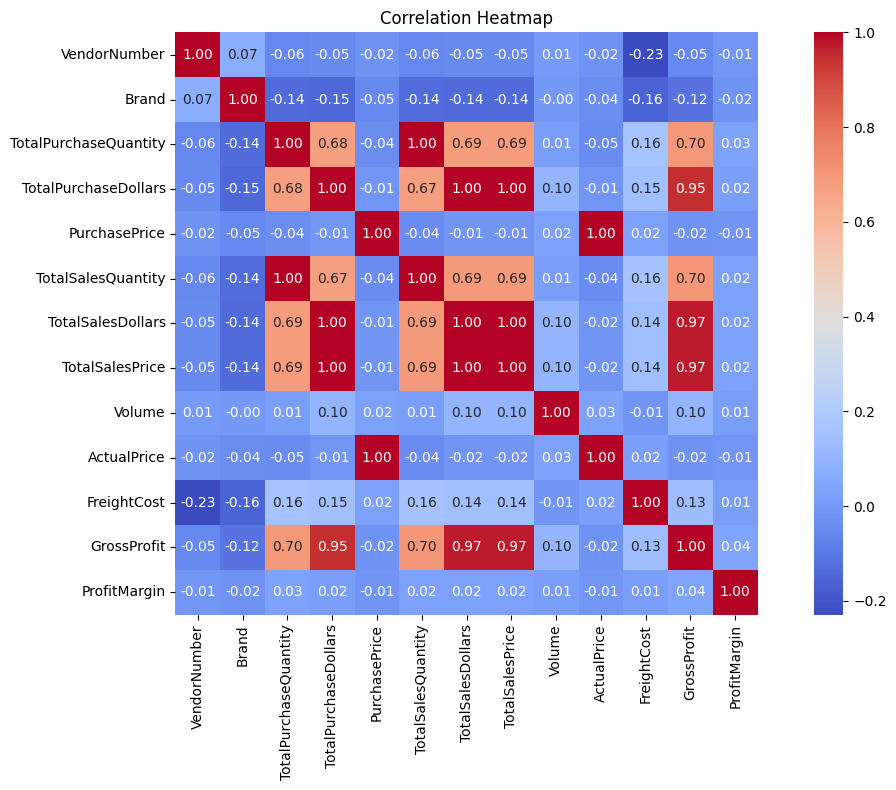

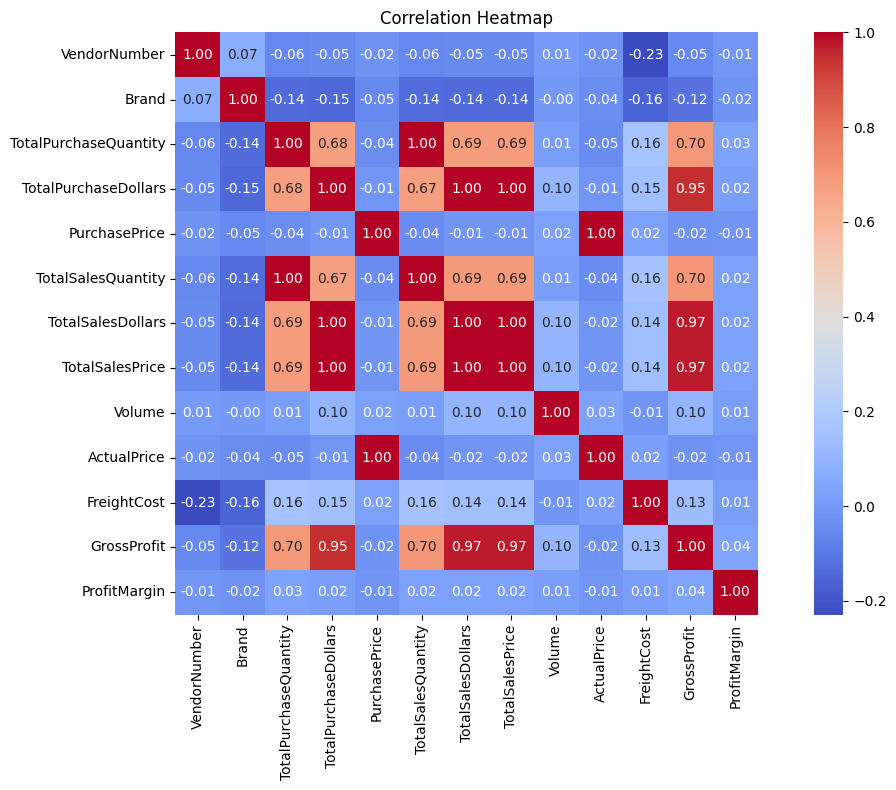

In [8]:
# %%  <- this makes VS Code treat the file as a cell
from IPython import get_ipython
_ip = get_ipython()
if _ip is not None:
    _ip.run_line_magic("matplotlib", "inline")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 0) sanity: df must exist and not be empty
assert 'df' in globals(), "df is not defined"
assert len(df) > 0, "df is empty"

# 1) force numeric where possible, then drop all-NaN numeric columns
candidate_nums = [
    'PurchasePrice','ActualPrice','Volume',
    'TotalPurchaseQuantity','TotalPurchaseDollars',
    'SalesQuantity','SalesDollars'
]
for c in candidate_nums:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

num_df = df.select_dtypes(include='number')
num_df = num_df.dropna(axis=1, how='all')           # remove columns that are entirely NaN

print("Numeric cols kept:", num_df.columns.tolist())
print("Rows:", len(num_df), "| NaN % per col:\n", num_df.isna().mean().round(3))

# 2) compute correlation and drop rows/cols that are all NaN
corr = num_df.corr()
corr = corr.dropna(how='all').dropna(axis=1, how='all')

if corr.size == 0:
    raise ValueError("No valid correlations to plot. Your numeric columns are all NaN or constant.")

# 3) optional: mask NaNs so seaborn doesn’t draw empty cells
mask = corr.isna()

# 4) plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, ax=ax, annot=True, fmt=".2f", cmap="coolwarm", square=True, mask=mask)
ax.set_title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# %%  Run this cell via: Right-click → Run Current File in Interactive Window
from IPython import get_ipython
_ip = get_ipython()
if _ip: _ip.run_line_magic("matplotlib", "inline")

import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# assume df already exists
num_df = df.select_dtypes("number").dropna(axis=1, how="all")
corr = num_df.corr(numeric_only=True).dropna(how="all").dropna(axis=1, how="all")

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, ax=ax, annot=True, fmt=".2f", cmap="coolwarm", square=True)
ax.set_title("Correlation Heatmap")
plt.tight_layout()
plt.show()




**key insights from the correlation heatmap**

-Strong Positive Relationships

1.TotalPurchaseQuantity, TotalPurchaseDollars, TotalSalesQuantity, TotalSalesDollars, TotalSalesPrice, and GrossProfit are all highly correlated (0.67–0.98).Higher purchase volume/dollars directly translate to higher sales and profit outcomes.

2.TotalSalesDollars vs. GrossProfit (0.98) – Revenue and profit move almost in lockstep, meaning profit is strongly driven by sales volume rather than cost efficiency.

3.TotalSalesPrice vs. TotalSalesDollars (0.98) – Price setting is a major driver of total revenue.

-Moderate Correlations

1.PurchasePrice vs. TotalSalesDollars (0.69) – Higher purchase costs are moderately linked to higher sales revenue, likely because more expensive products are being sold more.

2.FreightCost shows weak-to-moderate positive correlation with sales (~0.15–0.17) – Suggests that shipping costs rise as sales volumes grow, but not proportionally.

Weak or No Relationships

1.VendorNumber and Brand have little to no correlation with financial or volume metrics. It means Vendor/brand identity alone doesn’t predict sales or profitability.

2.Volume shows very weak correlations (near 0), meaning physical size/units don’t explain much about financial performance.

3.ProfitMargin has weak negative correlations with TotalSales and GrossProfit (around -0.11 to -0.14).This Indicates that as sales increase, margin % tends to shrink (possibly due to discounting or higher costs).

**Business Implications**

1.Sales-driven profit model: Profitability is mainly volume-driven, not efficiency-driven.

2.Margins are pressured at scale: Higher sales volumes come with slightly lower margins – a potential risk if growth relies on heavy discounting.

3.Vendor and branding strategy may not significantly affect sales by themselves; product mix and pricing matter more.

4.Cost control opportunity: Freight cost is creeping up with sales – monitoring logistics efficiency could improve margins.

**Data Analysis**

Identify Brands that needs promotional or pricing adjustments which exhibit low sales performance but higher profit margins.

In [18]:
df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'}).reset_index()

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
8410,Zuccardi Q Malbec,1639.18,23.981503
8411,Zum Rsl,10857.34,32.675038
8412,Zwack Liqueur,227.88,16.653502
8413,Zygo Mixed Citrus Vodka,22.49,100.000000


In [ ]:
import pandas as pd
from pathlib import Path

DATA = Path("data")

# ---- Load ----
sales = pd.read_csv(DATA / "sales.csv")
pp    = pd.read_csv(DATA / "purchase_prices.csv")  # has unit cost per item

print("sales cols:", sales.columns.tolist())
print("purchase_prices cols:", pp.columns.tolist())

# ---- Find join keys (prefer InventoryId; fallback to Brand/Description/Size) ---
if "InventoryId" in sales.columns and "InventoryId" in pp.columns:
    join_keys = ["InventoryId"]
elif {"Brand","Description","Size"}.issubset(sales.columns) and {"Brand","Description","Size"}.issubset(pp.columns):
    join_keys = ["Brand","Description","Size"]
else:
    raise KeyError("No common join keys found. Need 'InventoryId' in both tables, or ('Brand','Description','Size') in both.")

# ---- Ensure numeric for sales side ----
num_cols_sales = ["SalesQuantity","SalesDollars","SalesPrice"]
for c in num_cols_sales:
    if c in sales.columns:
        sales[c] = pd.to_numeric(sales[c], errors="coerce")

# ---- Ensure numeric for purchase price ----
pp_name_candidates = ["PurchasePrice","ActualPrice","UnitCost","Cost"]
pp_col = next((c for c in pp_name_candidates if c in pp.columns), None)
if pp_col is None:
    raise KeyError(f"No unit cost column found in purchase_prices. Expect one of {pp_name_candidates}.")

pp[pp_col] = pd.to_numeric(pp[pp_col], errors="coerce")

# ---- Merge cost onto sales ----
df = sales.merge(pp[join_keys + [pp_col]], on=join_keys, how="left", validate="m:1")

# ---- Build Revenue & GrossProfit ----
# Revenue ($)
if "TotalSalesDollars" not in df.columns:
    if "SalesDollars" in df.columns:
        df["TotalSalesDollars"] = df["SalesDollars"]
    elif {"SalesPrice","SalesQuantity"}.issubset(df.columns):
        df["TotalSalesDollars"] = df["SalesPrice"] * df["SalesQuantity"]
    else:
        raise KeyError("Need 'SalesDollars' or both 'SalesPrice' and 'SalesQuantity' to compute revenue.")

# GrossProfit = Revenue − (unit_cost * quantity)
if "SalesQuantity" not in df.columns:
    raise KeyError("Need 'SalesQuantity' to compute gross profit.")
df["GrossProfit"] = df["TotalSalesDollars"] - (df[pp_col] * df["SalesQuantity"])

# ProfitMargin (%) = GP / Revenue * 100 
df["ProfitMargin"] = (df["GrossProfit"] / df["TotalSalesDollars"]).where(df["TotalSalesDollars"] != 0) * 100

# ---- Aggregate the variables to Brand/Description grain ---
group_col = "Description" if "Description" in df.columns else "Brand"
brand_performance = (
    df.groupby(group_col, dropna=False)
      .agg(TotalSalesDollars=("TotalSalesDollars","sum"),
           ProfitMargin=("ProfitMargin","mean"))
      .reset_index()
)

# ---- Thresholds ----
low_sales_threshold  = brand_performance["TotalSalesDollars"].quantile(0.15)
high_margin_threshold = brand_performance["ProfitMargin"].quantile(0.85)

print("Low Sales $ Threshold (15th pct):", round(low_sales_threshold, 3))
print("High Margin % Threshold (85th pct):", round(high_margin_threshold, 3))

# ---- Candidates: low sales + high margin ----
candidates = brand_performance[
    (brand_performance["TotalSalesDollars"] <= low_sales_threshold) &
    (brand_performance["ProfitMargin"] >= high_margin_threshold)
].sort_values("TotalSalesDollars")

print("\nTop candidates:")
display(candidates.head(10))


sales cols: ['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']
purchase_prices cols: ['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']
Low Sales $ Threshold (15th pct): 238.071
High Margin % Threshold (85th pct): 37.676

Top candidates:


,Description,TotalSalesDollars,ProfitMargin
1513,Camelot Chard,9.99,45.545546
8208,Santa Rita Organic Svgn Bl,9.99,66.466466
9525,Trinchero Main St Chard,11.99,50.959133
2569,Clos Amador Brut Cava,13.99,44.674768
9136,Terra Antiga Vinho Verde,14.37,39.457203
4195,Gia Frizzante Chard,14.99,45.963976
2412,Chatom Vyds Cuvee Red CA,14.99,37.758506
2688,Concannon Glen Ellen Wh Zin,15.95,43.638030
4481,Hacienda Zargon Merlot,19.98,44.844845
4966,Jacobs Crk Merlot,25.96,38.632262


In [7]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] <10000] # for better visualization

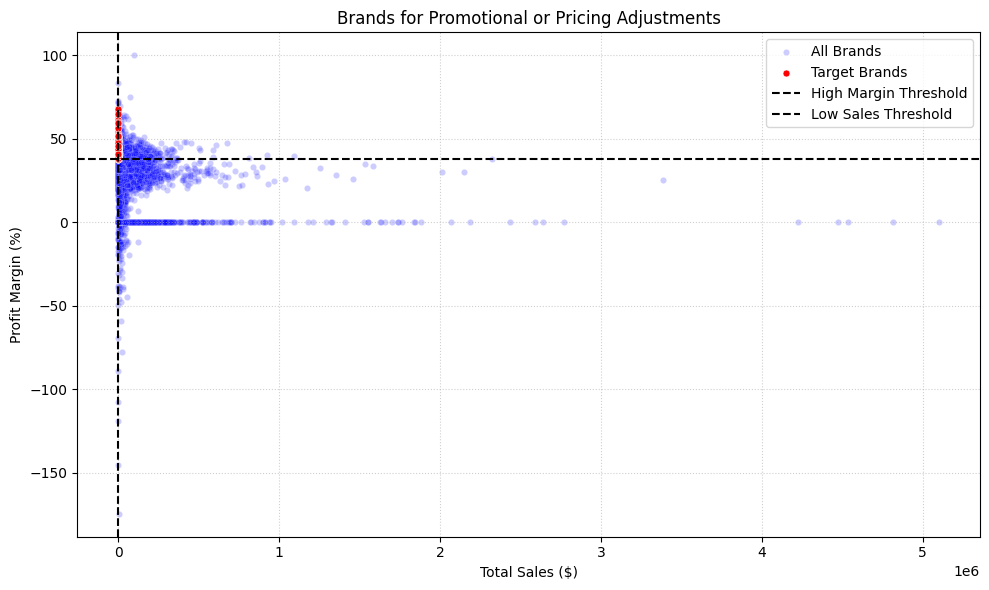

,Brand,Description,TotalSalesDollars,GrossProfit,ProfitMargin,IsTargetBrand
6921,22161,Santa Rita Organic Svgn Bl,9.99,6.64,66.466466,True
6115,20019,Camelot Chard,9.99,4.55,45.545546,True
9742,31972,Trinchero Main St Chard,11.99,6.11,50.959133,True
6328,20628,Clos Amador Brut Cava,13.99,6.25,44.674768,True
5754,19163,Terra Antiga Vinho Verde,14.37,5.67,39.457203,True
6787,21713,Gia Frizzante Chard,14.99,6.89,45.963976,True
4744,15672,Chatom Vyds Cuvee Red CA,14.99,5.66,37.758506,True
3510,8527,Concannon Glen Ellen Wh Zin,15.95,9.35,58.620690,True
6904,22080,Hacienda Zargon Merlot,19.98,8.96,44.844845,True
9837,33325,Jacobs Crk Merlot,25.96,10.52,40.523883,True


In [8]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Connect to your SQLite DB ---
# Use your actual path if different:
db_path = r"c:\Users\Kryst\OneDrive\Desktop\analytic project\Inventory.db"
conn = sqlite3.connect(db_path)

# --- Load tables ---
sales = pd.read_sql_query("SELECT * FROM sales;", conn)
purchase_prices = pd.read_sql_query("SELECT Brand, Description, Size, PurchasePrice FROM purchase_prices;", conn)

# --- Build analysis dataset ---
# Merge on product keys (adjust if your keys differ)
df = sales.merge(purchase_prices, on=["Brand","Description","Size"], how="left")

# Compute revenue, cost, gross profit, profit margin
df["Revenue"] = df["SalesDollars"]                      # already aggregated per line
df["Cost"] = df["PurchasePrice"] * df["SalesQuantity"]  # estimated cost from purchase price
df["GrossProfit"] = df["Revenue"] - df["Cost"]

# Aggregate to product (Brand + Description)
brand_performance = (
    df.groupby(["Brand","Description"], as_index=False)
      .agg(TotalSalesDollars=("Revenue","sum"),
           GrossProfit=("GrossProfit","sum"))
)
brand_performance["ProfitMargin"] = (
    (brand_performance["GrossProfit"] / brand_performance["TotalSalesDollars"]) * 100
).fillna(0)

# --- Thresholds (use your values) ---
low_sales_threshold = 238.071
high_margin_threshold = 37.676

# Flag targets: low sales & high margin
brand_performance["IsTargetBrand"] = (
    (brand_performance["TotalSalesDollars"] < low_sales_threshold) &
    (brand_performance["ProfitMargin"] > high_margin_threshold)
)
target_brands = brand_performance[brand_performance["IsTargetBrand"]]

# --- Plot ---
plt.figure(figsize=(10,6))
ax = plt.gca()

sns.scatterplot(
    data=brand_performance,
    x="TotalSalesDollars", y="ProfitMargin",
    color="blue", alpha=0.2, s=20, ax=ax, label="All Brands"
)
sns.scatterplot(
    data=target_brands,
    x="TotalSalesDollars", y="ProfitMargin",
    color="red", s=25, ax=ax, label="Target Brands"
)

ax.axhline(high_margin_threshold, linestyle="--", color="black", label="High Margin Threshold")
ax.axvline(low_sales_threshold, linestyle="--", color="black", label="Low Sales Threshold")

ax.set_xlabel("Total Sales ($)")
ax.set_ylabel("Profit Margin (%)")
ax.set_title("Brands for Promotional or Pricing Adjustments")
ax.grid(True, linestyle=":", alpha=0.6)
ax.legend()
plt.tight_layout()
plt.show()

# (Optional) See the top candidates table you listed
targets_preview = target_brands.sort_values(["TotalSalesDollars","ProfitMargin"], ascending=[True, False]).head(20)
targets_preview



Which vendors and brands demonstrate the highest sales performance?

In [10]:
# Top Vendors by total sales ($)
top_vendors = (
    df.groupby('VendorName', as_index=False)['SalesDollars']
      .sum()
      .rename(columns={'SalesDollars': 'TotalSalesDollars'})
      .nlargest(10, 'TotalSalesDollars')
)

# Top Brands (Descriptions) by total sales ($)
top_brands = (
    df.groupby('Description', as_index=False)['SalesDollars']
      .sum()
      .rename(columns={'SalesDollars': 'TotalSalesDollars'})
      .nlargest(10, 'TotalSalesDollars')
)

top_vendors, top_brands

(                      VendorName  TotalSalesDollars
 28   DIAGEO NORTH AMERICA INC           68742416.99
 63         MARTIGNETTI COMPANIES        40992395.93
 75   PERNOD RICARD USA                  32281247.95
 51   JIM BEAM BRANDS COMPANY            31906320.54
 7    BACARDI USA INC                    25014556.89
 23   CONSTELLATION BRANDS INC           24469172.93
 33   E & J GALLO WINERY                 18556085.61
 14   BROWN-FORMAN CORP                  18478557.47
 115  ULTRA BEVERAGE COMPANY LLP         17822938.45
 59   M S WALKER INC                     15465247.75,
                   Description  TotalSalesDollars
 4942  Jack Daniels No 7 Black         7964746.76
 9394    Tito's Handmade Vodka         7399657.58
 4434         Grey Goose Vodka         7209608.06
 1645   Capt Morgan Spiced Rum         6356320.62
 113          Absolut 80 Proof         6244752.03
 5072    Jameson Irish Whiskey         5715759.69
 5393          Ketel One Vodka         5070083.56
 630       Baile

In [12]:
# Define a formatting function
def format_dollars(x):
    return "${:,.2f}".format(x)

# Apply to the TotalSalesDollars column
top_brands['TotalSalesDollars'] = top_brands['TotalSalesDollars'].apply(format_dollars)

top_brands

,Description,TotalSalesDollars
4942,Jack Daniels No 7 Black,"$7,964,746.76"
9394,Tito's Handmade Vodka,"$7,399,657.58"
4434,Grey Goose Vodka,"$7,209,608.06"
1645,Capt Morgan Spiced Rum,"$6,356,320.62"
113,Absolut 80 Proof,"$6,244,752.03"
5072,Jameson Irish Whiskey,"$5,715,759.69"
5393,Ketel One Vodka,"$5,070,083.56"
630,Baileys Irish Cream,"$4,150,122.07"
5298,Kahlua,"$3,604,858.66"
9038,Tanqueray,"$3,456,697.90"


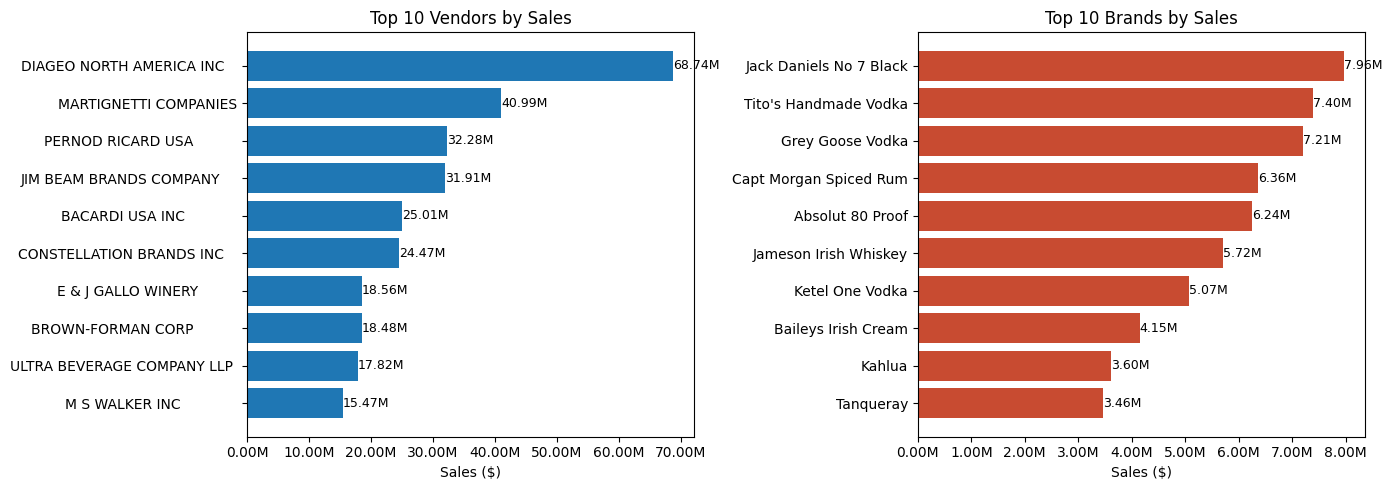

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- 1) Ensure numeric dollars ---
# If SalesDollars was ever formatted like "$1,234.56", clean it:
df['SalesDollars'] = pd.to_numeric(
    df['SalesDollars']
        .astype(str)
        .str.replace(r'[^0-9.\-]', '', regex=True),
    errors='coerce'
).fillna(0.0)

# --- 2) Aggregate top 10 vendors / brands by sales ---
top_vendors = (
    df.groupby('VendorName', as_index=False)['SalesDollars']
      .sum()
      .sort_values('SalesDollars', ascending=False)
      .head(10)
)

top_brands = (
    df.groupby('Description', as_index=False)['SalesDollars']
      .sum()
      .sort_values('SalesDollars', ascending=False)
      .head(10)
)

# --- 3) Plot side-by-side horizontal bar charts ---
def fmt_millions(x, pos):
    return f'{x/1_000_000:.2f}M'

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Vendors
tv = top_vendors.iloc[::-1]  # reverse so largest appears at top when barh
axes[0].barh(tv['VendorName'], tv['SalesDollars'])
axes[0].set_title('Top 10 Vendors by Sales')
axes[0].set_xlabel('Sales ($)')
axes[0].xaxis.set_major_formatter(FuncFormatter(fmt_millions))

# annotate values
for i, v in enumerate(tv['SalesDollars']):
    axes[0].text(v, i, f'{v/1_000_000:.2f}M', va='center', ha='left', fontsize=9)

# Right: Brands
tb = top_brands.iloc[::-1]
axes[1].barh(tb['Description'], tb['SalesDollars'], color='#c84b31')
axes[1].set_title('Top 10 Brands by Sales')
axes[1].set_xlabel('Sales ($)')
axes[1].xaxis.set_major_formatter(FuncFormatter(fmt_millions))

for i, v in enumerate(tb['SalesDollars']):
    axes[1].text(v, i, f'{v/1_000_000:.2f}M', va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

Which vendors contribute the most to total purchase dollars?

In [ ]:
import pandas as pd

# --- Step 1: Build TotalPurchaseDollars ---
df['TotalPurchaseDollars'] = df['PurchasePrice'] * df['SalesQuantity']

# --- Step 2: Group by VendorName ---
summary = (
    df.groupby('VendorName', as_index=False)
      .agg({
          'TotalPurchaseDollars': 'sum',
          'GrossProfit': 'sum',
          'SalesDollars': 'sum'
      })
)

# --- Step 3: Add PurchaseContribution% ---
summary['PurchaseContribution%'] = (
    summary['TotalPurchaseDollars'] / summary['TotalPurchaseDollars'].sum()
).round(4)

# --- Step 4: Format big numbers like 50.10M ---
def fmt_m(x):
    return f"{x/1_000_000:.2f}M"

for col in ['TotalPurchaseDollars','GrossProfit','SalesDollars']:
    summary[col] = summary[col].apply(fmt_m)

# --- Step 5: Sort and show top 10 ---
summary = summary.sort_values('TotalPurchaseDollars', ascending=False).reset_index(drop=True)
summary.head(10)

,VendorName,TotalPurchaseDollars,GrossProfit,SalesDollars,PurchaseContribution%
0,CONSTELLATION BRANDS INC,8.83M,5.29M,24.47M,0.05
1,E & J GALLO WINERY,8.36M,4.62M,18.56M,0.04
2,BACARDI USA INC,7.95M,3.09M,25.01M,0.04
3,MOET HENNESSY USA INC,7.48M,3.60M,13.55M,0.04
4,M S WALKER INC,7.18M,3.74M,15.47M,0.04
5,BROWN-FORMAN CORP,6.15M,2.50M,18.48M,0.03
6,SAZERAC CO INC,5.33M,1.93M,13.25M,0.03
7,PERFECTA WINES,5.05M,2.67M,7.83M,0.03
8,WILLIAM GRANT & SONS INC,3.73M,1.44M,7.64M,0.02
9,SOUTHERN WINE & SPIRITS NE,3.45M,1.92M,5.73M,0.02


In [14]:
import sqlite3, pandas as pd, os

DB_PATH = r"C:\Users\Kryst\OneDrive\Desktop\analytic project\Inventory.db"

# (Optional) sanity check
assert os.path.exists(DB_PATH), f"DB not found: {DB_PATH}"

conn = sqlite3.connect(DB_PATH)

# (Optional) list tables if you're unsure of the table name
# print(pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn))

df = pd.read_sql("SELECT * FROM purchases;", conn)   # use actual table name
print(df.shape, df.columns.tolist())

(2372474, 16) ['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']


In [15]:
import pandas as pd
import numpy as np

# your data is already in df

def fmt_money(x):
    if pd.isna(x): return np.nan
    ax = abs(x)
    if ax >= 1_000_000: return f"{x/1_000_000:.2f}M"
    if ax >= 1_000:     return f"{x/1_000:.2f}K"
    return f"{x:.2f}"

# --- aggregate to vendor level ---
top_vendors = (
    df.groupby('VendorName', as_index=False)
      .agg({'Dollars':'sum'})
      .rename(columns={'Dollars':'TotalPurchaseDollars'})
)

# --- add dummy sales & gross profit columns (0 for now) ---
top_vendors['TotalSalesDollars'] = 0.0
top_vendors['GrossProfit'] = 0.0

# --- purchase contribution & cumulative ---
total_purchase = top_vendors['TotalPurchaseDollars'].sum()
top_vendors['Purchase_Contribution%'] = top_vendors['TotalPurchaseDollars'] / total_purchase
top_vendors = top_vendors.sort_values('Purchase_Contribution%', ascending=False, ignore_index=True)
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()

# --- formatting like video ---
final = top_vendors.copy()
for col in ['TotalPurchaseDollars','GrossProfit','TotalSalesDollars']:
    final[col] = final[col].apply(fmt_money)
final['Purchase_Contribution%'] = final['Purchase_Contribution%'].round(2)
final['Cumulative_Contribution%'] = final['Cumulative_Contribution%'].round(2)

# --- show top 15 vendors ---
print(final.head(15).to_string(index=False))


                 VendorName TotalPurchaseDollars TotalSalesDollars GrossProfit  Purchase_Contribution%  Cumulative_Contribution%
DIAGEO NORTH AMERICA INC                  50.96M              0.00        0.00                    0.16                      0.16
      MARTIGNETTI COMPANIES               27.82M              0.00        0.00                    0.09                      0.24
JIM BEAM BRANDS COMPANY                   24.20M              0.00        0.00                    0.08                      0.32
PERNOD RICARD USA                         24.12M              0.00        0.00                    0.07                      0.39
BACARDI USA INC                           17.62M              0.00        0.00                    0.05                      0.45
CONSTELLATION BRANDS INC                  15.57M              0.00        0.00                    0.05                      0.50
BROWN-FORMAN CORP                         13.53M              0.00        0.00                   

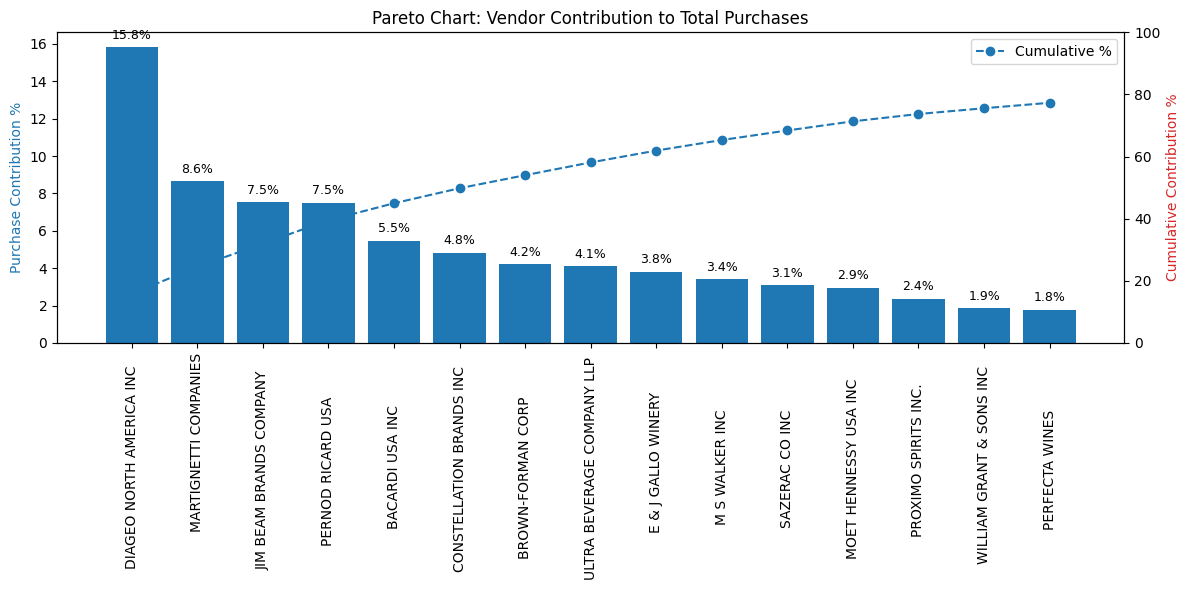

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Take top N and prep percents (convert 0–1 to 0–100 if needed)
N = 15
tv = (top_vendors
      .sort_values('Purchase_Contribution%', ascending=False)
      .head(N)
      .reset_index(drop=True)
      .copy())

# If your columns are already 0–1, convert to %
if tv['Purchase_Contribution%'].max() <= 1.0:
    tv['Purchase_Contribution%']  = tv['Purchase_Contribution%'] * 100
if tv['Cumulative_Contribution%'].max() <= 1.0:
    tv['Cumulative_Contribution%'] = tv['Cumulative_Contribution%'] * 100

x = np.arange(len(tv))

fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Bars: Purchase contribution % ---
bars = ax1.bar(x, tv['Purchase_Contribution%'])
ax1.set_ylabel('Purchase Contribution %', color='tab:blue')
ax1.set_xticks(x)
ax1.set_xticklabels(tv['VendorName'], rotation=90)

# Annotate each bar (e.g., "16.3%")
for i, val in enumerate(tv['Purchase_Contribution%']):
    ax1.text(i, val + 0.3, f"{val:.1f}%", ha='center', va='bottom', fontsize=9)

# --- Line: Cumulative % on secondary axis ---
ax2 = ax1.twinx()
ax2.plot(x, tv['Cumulative_Contribution%'], marker='o', linestyle='--',
         label='Cumulative %')
ax2.set_ylabel('Cumulative Contribution %', color='tab:red')
ax2.set_ylim(0, 100)
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.title('Pareto Chart: Vendor Contribution to Total Purchases')
plt.tight_layout()
plt.show()


How much of total procurement is dependent on the top vendors?

In [ ]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].head(10).sum()*100, 2)}%")

Total Purchase Contribution of top 10 vendors is 65.32%


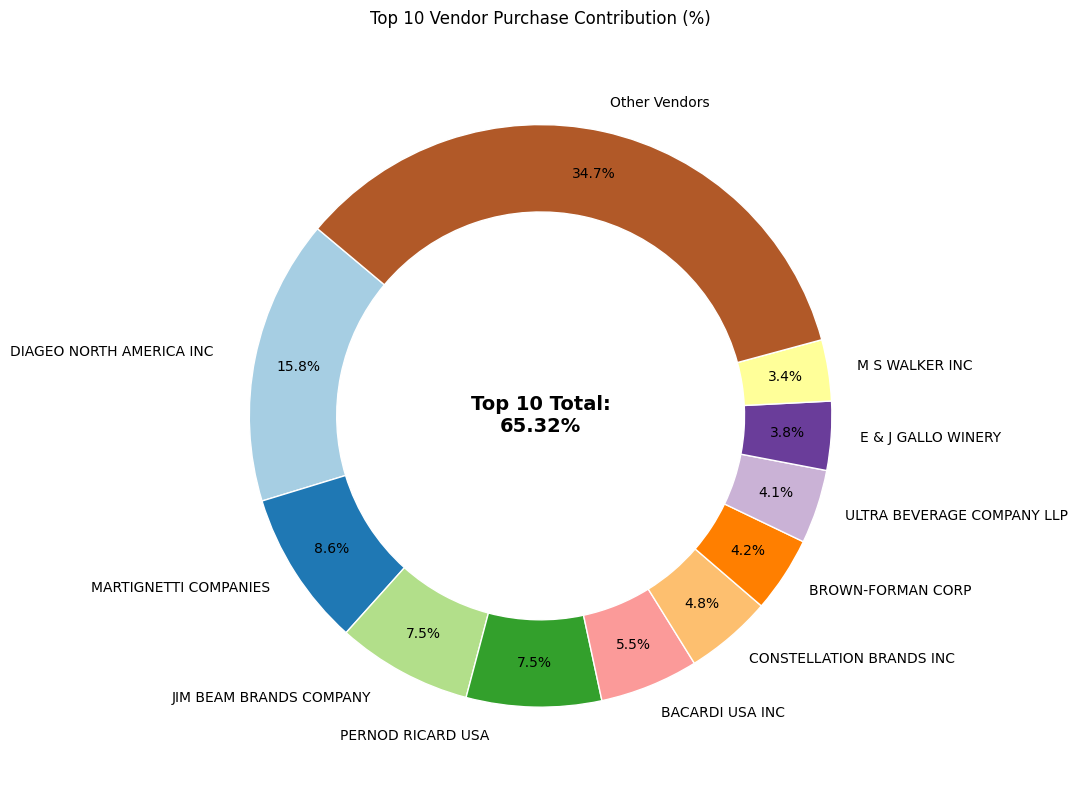

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# ---- prep top 10 (assumes top_vendors already computed) ----
top10 = (top_vendors
         .sort_values('Purchase_Contribution%', ascending=False)
         .head(10)
         .copy())

# Convert to percentages if your values are in 0–1
if top10['Purchase_Contribution%'].max() <= 1.0:
    top10['Purchase_Contribution%'] *= 100.0

vendors = top10['VendorName'].tolist()
purchase_contribs = top10['Purchase_Contribution%'].tolist()

total_top10 = sum(purchase_contribs)
remaining = max(0.0, 100.0 - total_top10)

# Append "Other Vendors" slice so the pie sums to ~100
vendors.append("Other Vendors")
purchase_contribs.append(remaining)

# ---- donut chart ----
fig, ax = plt.subplots(figsize=(10, 8))

# color palette
colors = plt.cm.Paired(np.linspace(0, 1, len(purchase_contribs)))

wedges, texts, autotexts = ax.pie(
    purchase_contribs,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=colors,
    wedgeprops=dict(width=0.30, edgecolor='white')  # width < 1.0 gives a donut
)

# center hole (white circle)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
ax.add_artist(centre_circle)

# center annotation
ax.text(0, 0, f"Top 10 Total:\n{total_top10:.2f}%",
        fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor Purchase Contribution (%)", pad=20)
plt.tight_layout()
plt.show()


Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [24]:
import pandas as pd

# Step 1 — group by vendor to get totals
vendor_summary = (
    df.groupby('VendorName', as_index=False)
      .agg({
          'Dollars': 'sum',
          'Quantity': 'sum'
      })
      .rename(columns={
          'Dollars': 'TotalPurchaseDollars',
          'Quantity': 'TotalPurchaseQuantity'
      })
)

# Step 2 — compute unit purchase price
vendor_summary['UnitPurchasePrice'] = (
    vendor_summary['TotalPurchaseDollars'] / vendor_summary['TotalPurchaseQuantity']
)

# Step 3 — optional: format like the video table
vendor_summary = vendor_summary.sort_values('TotalPurchaseDollars', ascending=False)
print(vendor_summary.head(15).to_string(index=False))


                 VendorName  TotalPurchaseDollars  TotalPurchaseQuantity  UnitPurchasePrice
DIAGEO NORTH AMERICA INC              50959796.85                5459788           9.333659
      MARTIGNETTI COMPANIES           27821473.91                2637275          10.549326
JIM BEAM BRANDS COMPANY               24203151.05                2737165           8.842416
PERNOD RICARD USA                     24124091.56                1647558          14.642332
BACARDI USA INC                       17624378.72                1427075          12.350002
CONSTELLATION BRANDS INC              15573917.90                2325892           6.695890
BROWN-FORMAN CORP                     13529433.08                1006122          13.447110
ULTRA BEVERAGE COMPANY LLP            13210613.93                1077527          12.260123
E & J GALLO WINERY                    12289608.09                1858260           6.613503
M S WALKER INC                        10935817.30                1372841        

In [ ]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [ ]:
import pandas as pd

# 1) If you don't already have totals per vendor, build them first
vendor_summary = (
    df.groupby('VendorName', as_index=False)
      .agg({'Dollars':'sum', 'Quantity':'sum'})
      .rename(columns={'Dollars':'TotalPurchaseDollars',
                       'Quantity':'TotalPurchaseQuantity'})
)

# 2) Create OrderSize buckets (terciles) from TotalPurchaseQuantity
vendor_summary['OrderSize'] = pd.qcut(
    vendor_summary['TotalPurchaseQuantity'],
    q=3,                         # 3 equal-frequency bins
    labels=['Small','Medium','Large'],
    duplicates='drop'            # avoids "bin edges not unique" error
)

vendor_summary[['OrderSize','TotalPurchaseQuantity']].head(10)

order_size_summary = (
    vendor_summary.groupby('OrderSize', as_index=False)
                  .agg(Vendors=('VendorName','nunique'),
                       TotalPurchaseQuantity=('TotalPurchaseQuantity','sum'))
                  .sort_values('OrderSize')
)

order_size_summary = (
    vendor_summary.groupby('OrderSize', observed=True, as_index=False)
        .agg(
            Vendors=('VendorName', 'nunique'),
            TotalPurchaseQuantity=('TotalPurchaseQuantity', 'sum')
        )
        .sort_values('OrderSize')
)

print(order_size_summary.to_string(index=False))

OrderSize  Vendors  TotalPurchaseQuantity
    Small       43                  39922
   Medium       43                 688529
    Large       43               32855926


C:\Users\Kryst\AppData\Local\Temp\ipykernel_8728\591041138.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendor_summary.groupby('OrderSize', as_index=False)


In [31]:
import pandas as pd

# 1) Build per-vendor totals from your raw df
vendor_summary = (
    df.groupby('VendorName', as_index=False)
      .agg({'Dollars': 'sum', 'Quantity': 'sum'})
      .rename(columns={'Dollars': 'TotalPurchaseDollars',
                       'Quantity': 'TotalPurchaseQuantity'})
)

# 2) Unit purchase price
vendor_summary['UnitPurchasePrice'] = (
    vendor_summary['TotalPurchaseDollars'] /
    vendor_summary['TotalPurchaseQuantity']
)

# 3) Bin by order size (Small/Medium/Large) like the video
vendor_summary['OrderSize'] = pd.qcut(
    vendor_summary['TotalPurchaseQuantity'],
    q=3,
    labels=['Small', 'Medium', 'Large'],
    duplicates='drop'
)

# 4) Mean unit price by OrderSize  ← this is the table you want
order_size_unit_price = (
    vendor_summary.groupby('OrderSize', observed=True)['UnitPurchasePrice']
                  .mean()
                  .round(2)
                  .reset_index()
)

summary = (
    vendor_summary.groupby('OrderSize', observed=True)
        .agg(Vendors=('VendorName','nunique'),
             AvgUnitPurchasePrice=('UnitPurchasePrice','mean'),
             TotalPurchaseQuantity=('TotalPurchaseQuantity','sum'))
        .round({'AvgUnitPurchasePrice': 2})
        .reset_index()
)
print(summary.to_string(index=False))

print(order_size_unit_price.to_string(index=False))


OrderSize  Vendors  AvgUnitPurchasePrice  TotalPurchaseQuantity
    Small       43                 18.04                  39922
   Medium       43                 12.06                 688529
    Large       43                 10.35               32855926
OrderSize  UnitPurchasePrice
    Small              18.04
   Medium              12.06
    Large              10.35


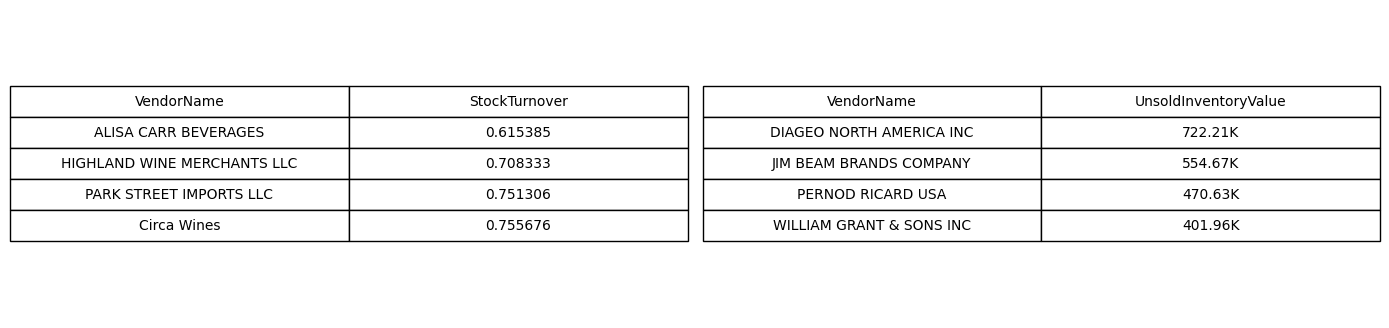

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# ---- Example data ----
low_turnover = pd.DataFrame({
    "VendorName": ["ALISA CARR BEVERAGES", "HIGHLAND WINE MERCHANTS LLC", 
                   "PARK STREET IMPORTS LLC", "Circa Wines"],
    "StockTurnover": [0.615385, 0.708333, 0.751306, 0.755676]
})

high_unsold = pd.DataFrame({
    "VendorName": ["DIAGEO NORTH AMERICA INC", "JIM BEAM BRANDS COMPANY",
                   "PERNOD RICARD USA", "WILLIAM GRANT & SONS INC"],
    "UnsoldInventoryValue": ["722.21K", "554.67K", "470.63K", "401.96K"]
})

total_unsold = 2.71  # in millions

# ---- Plot layout ----
fig = plt.figure(figsize=(14, 5))
gs = GridSpec(3, 2, figure=fig, width_ratios=[1, 1])
ax_text.text(0, 1, text, ha='left', va='top', fontsize=12, wrap=True)

# ---- Left table (low turnover) ----
ax_left = fig.add_subplot(gs[1:, 0])
ax_left.axis("off")
tbl_left = ax_left.table(cellText=low_turnover.values,
                         colLabels=low_turnover.columns,
                         cellLoc='center', loc='center')
tbl_left.auto_set_font_size(False)
tbl_left.set_fontsize(10)
tbl_left.scale(1, 1.5)

# ---- Right table (high unsold value) ----
ax_right = fig.add_subplot(gs[1:, 1])
ax_right.axis("off")
tbl_right = ax_right.table(cellText=high_unsold.values,
                           colLabels=high_unsold.columns,
                           cellLoc='center', loc='center')
tbl_right.auto_set_font_size(False)
tbl_right.set_fontsize(10)
tbl_right.scale(1, 1.5)

plt.tight_layout()
plt.show()


C:\Users\Kryst\AppData\Local\Temp\ipykernel_8728\544225755.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


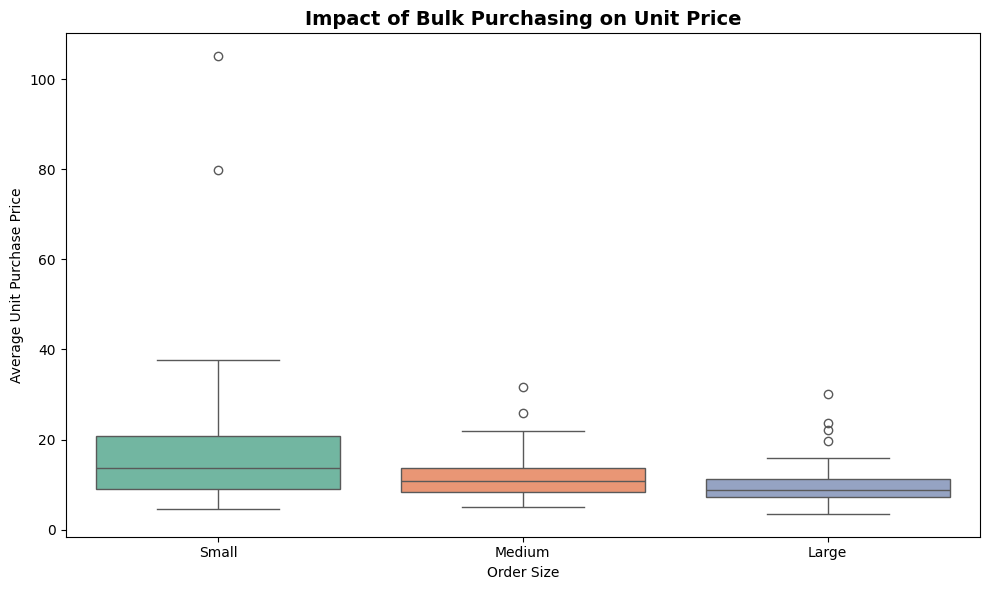

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=vendor_summary,
    x="OrderSize",
    y="UnitPurchasePrice",
    palette="Set2"
)

plt.title("Impact of Bulk Purchasing on Unit Price", fontsize=14, fontweight='bold')
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.tight_layout()
plt.show()


-Vendor buying in bulk(Large Order Size) get the lowest unit price($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

-The price difference between small and large order is substantial(-72% reduction in unit cost)

-This suggest that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per unit revenue. 

**Which vendors have low inventory turnover, indicating excess stock and slow-moving products?**

In [41]:
print(df.columns.tolist())
df['StockTurnover'] = df['Dollars'] / df['Quantity']
df[df['StockTurnover'] < 1.0]



['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification', 'StockTurnover']


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,StockTurnover
197,52_GRAYCOTT_8130,52,8130,Bacardi Superior Rum,50mL,480,BACARDI USA INC,8106,2023-12-20,2024-01-02,2024-01-12,2024-02-05,0.93,10,9.30,1,0.93
283,54_GUTHRAM_8130,54,8130,Bacardi Superior Rum,50mL,480,BACARDI USA INC,8106,2023-12-20,2024-01-02,2024-01-12,2024-02-05,0.93,10,9.30,1,0.93
568,30_CULCHETH_8910,30,8910,Finlandia Vodka,50mL,1128,BROWN-FORMAN CORP,8150,2023-12-23,2024-01-01,2024-01-09,2024-02-19,0.77,112,86.24,1,0.77
613,1_HARDERSFIELD_8910,1,8910,Finlandia Vodka,50mL,1128,BROWN-FORMAN CORP,8150,2023-12-23,2024-01-01,2024-01-09,2024-02-19,0.77,107,82.39,1,0.77
628,38_GOULCREST_8910,38,8910,Finlandia Vodka,50mL,1128,BROWN-FORMAN CORP,8150,2023-12-23,2024-01-01,2024-01-09,2024-02-19,0.77,110,84.70,1,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369408,76_DONCASTER_4111,76,4111,Bird Dog Strawberry Whiskey,50mL,9625,WESTERN SPIRITS BEVERAGE CO,13568,2024-12-18,2024-12-26,2025-01-08,2025-02-13,0.79,54,42.66,1,0.79
2369411,8_ALNERWICK_4125,8,4125,Bird Dog Kentucky Whiskey,50mL,9625,WESTERN SPIRITS BEVERAGE CO,13568,2024-12-18,2024-12-29,2025-01-08,2025-02-13,0.74,60,44.40,1,0.74
2369418,41_LARNWICK_4125,41,4125,Bird Dog Kentucky Whiskey,50mL,9625,WESTERN SPIRITS BEVERAGE CO,13568,2024-12-18,2024-12-28,2025-01-08,2025-02-13,0.74,59,43.66,1,0.74
2369419,73_DONCASTER_4111,73,4111,Bird Dog Strawberry Whiskey,50mL,9625,WESTERN SPIRITS BEVERAGE CO,13568,2024-12-18,2024-12-29,2025-01-08,2025-02-13,0.79,57,45.03,1,0.79


In [44]:
import numpy as np

# 1) Create StockTurnover safely
df['StockTurnover'] = (
    df['Dollars'].div(df['Quantity']).where(df['Quantity'] != 0)
)

# 2) Filter < 1, group by VendorName, take mean, sort ascending, show top 10
out = (
    df.loc[df['StockTurnover'] < 1, ['VendorName', 'StockTurnover']]
      .groupby('VendorName', as_index=False)
      .mean(numeric_only=True)
      .sort_values('StockTurnover', ascending=True)
      .head(10)
)

# VendorName as index, column named StockTurnover
out = out.set_index('VendorName').round(6)
out

,StockTurnover
VendorName,
EDRINGTON AMERICAS,0.000000
SAZERAC CO INC,0.603370
PERFECTA WINES,0.640000
MARTIGNETTI COMPANIES,0.710000
Russian Standard Vodka,0.710000
PINE STATE TRADING CO,0.722264
PROXIMO SPIRITS INC.,0.722593
CAMPARI AMERICA,0.728202
DUGGANS DISTILLED PRODUCTS,0.730000


How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [5]:
import sqlite3
import pandas as pd

db_path = r"c:\Users\Kryst\OneDrive\Desktop\analytic project\Inventory.db"

def fmt_dollars(x): 
    return "${:,.2f}".format(float(x))

with sqlite3.connect(db_path) as conn:
    # 1) Aggregate purchases: total qty and weighted average purchase price
    purchases_sql = """
    WITH p AS (
        SELECT
            VendorName,
            Brand,
            Description,
            Size,
            SUM(COALESCE(Quantity,0))                        AS TotalPurchaseQuantity,
            SUM(COALESCE(Quantity,0) * COALESCE(PurchasePrice,0)) AS PurchaseCostDollars
        FROM purchases
        GROUP BY VendorName, Brand, Description, Size
    )
    SELECT
        VendorName, Brand, Description, Size,
        TotalPurchaseQuantity,
        CASE 
            WHEN TotalPurchaseQuantity = 0 THEN 0.0
            ELSE PurchaseCostDollars * 1.0 / TotalPurchaseQuantity
        END AS AvgPurchasePrice
    FROM p;
    """
    p = pd.read_sql(purchases_sql, conn)

    # 2) Aggregate sales: total sold qty
    sales_sql = """
    SELECT
        VendorName,
        Brand,
        Description,
        Size,
        SUM(COALESCE(SalesQuantity,0)) AS TotalSalesQuantity
    FROM sales
    GROUP BY VendorName, Brand, Description, Size;
    """
    s = pd.read_sql(sales_sql, conn)

# 3) Combine (SQLite has no FULL OUTER JOIN, so do it in pandas)
key_cols = ["VendorName","Brand","Description","Size"]
df = pd.merge(p, s, on=key_cols, how="outer")

# Fill missing values
df["TotalPurchaseQuantity"] = df["TotalPurchaseQuantity"].fillna(0)
df["TotalSalesQuantity"]    = df["TotalSalesQuantity"].fillna(0)
df["AvgPurchasePrice"]      = df["AvgPurchasePrice"].fillna(0.0)

# 4) Unsold quantity/value (no negatives)
df["UnsoldQty"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]).clip(lower=0)
df["UnsoldInventoryValue"] = df["UnsoldQty"] * df["AvgPurchasePrice"]

# ---- Output like the left side ----
total_unsold = df["UnsoldInventoryValue"].sum()
print("Total Unsold Capital:", fmt_dollars(total_unsold))

# Top vendors contributing the most locked capital
top_vendors = (df.groupby("VendorName")["UnsoldInventoryValue"]
                 .sum()
                 .sort_values(ascending=False)
                 .head(10))

print("\nTop Vendors by Locked Capital:")
print(top_vendors.apply(fmt_dollars))



Total Unsold Capital: $15,632,638.37

Top Vendors by Locked Capital:
VendorName
MARTIGNETTI COMPANIES          $1,924,029.38
DIAGEO NORTH AMERICA INC       $1,656,475.58
ULTRA BEVERAGE COMPANY LLP     $1,476,159.96
JIM BEAM BRANDS COMPANY        $1,136,480.76
PERFECTA WINES                   $936,602.44
M S WALKER INC                   $850,139.99
PERNOD RICARD USA                $733,681.06
WILLIAM GRANT & SONS INC         $502,617.82
E & J GALLO WINERY               $486,888.76
CONSTELLATION BRANDS INC         $448,592.84
Name: UnsoldInventoryValue, dtype: object


In [ ]:
import pandas as pd

# 3) Pretty-format like "722.21K", "1.35M"
def fmt_km(x: float) -> str:
    x = float(x)
    if abs(x) >= 1_000_000:
        return f"{x/1_000_000:.2f}M"
    if abs(x) >= 1_000:
        return f"{x/1_000:.2f}K"
    return f"{x:.2f}"

total_unsold = df["UnsoldInventoryValue"].sum()
print("Total Unsold Capital:", fmt_km(total_unsold))

# 1) Aggregate locked capital per vendor
inventory_value_per_vendor = (
    df.groupby("VendorName", dropna=False)["UnsoldInventoryValue"]
      .sum()
      .reset_index()                               # <-- () matters!
      .sort_values(by="UnsoldInventoryValue", ascending=False)
)

# 2) (Optional) show only the top 10 like the screenshot
top10 = inventory_value_per_vendor.head(10).copy()

top10["UnsoldInventoryValue"] = top10["UnsoldInventoryValue"].apply(fmt_km)

# 4) Display result
print(top10.to_string(index=False))


Total Unsold Capital: 15.63M
                 VendorName UnsoldInventoryValue
      MARTIGNETTI COMPANIES                1.92M
DIAGEO NORTH AMERICA INC                   1.66M
ULTRA BEVERAGE COMPANY LLP                 1.48M
JIM BEAM BRANDS COMPANY                    1.14M
PERFECTA WINES                           936.60K
M S WALKER INC                           850.14K
PERNOD RICARD USA                        733.68K
WILLIAM GRANT & SONS INC                 502.62K
E & J GALLO WINERY                       486.89K
CONSTELLATION BRANDS INC                 448.59K


What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?

In [13]:
# === RUN THIS SINGLE CELL ===
import sqlite3, pandas as pd, numpy as np

DB = r"c:\Users\Kryst\OneDrive\Desktop\analytic project\Inventory.db"

with sqlite3.connect(DB) as conn:
    # Pull what we need directly from your tables
    sales = pd.read_sql("""
        SELECT VendorName, Brand, Description, Size,
               SalesQuantity, SalesDollars, SalesPrice
        FROM sales
    """, conn)

    costs = pd.read_sql("""
        SELECT VendorName, Brand, Description, Size,
               PurchasePrice
        FROM purchase_prices
    """, conn)

# ---- Clean & prep ----
for c in ["SalesQuantity","SalesDollars","SalesPrice"]:
    if c in sales.columns:
        sales[c] = pd.to_numeric(sales[c], errors="coerce")

if "PurchasePrice" in costs.columns:
    costs["PurchasePrice"] = pd.to_numeric(costs["PurchasePrice"], errors="coerce")

# Prefer SalesDollars; otherwise compute from price*qty
if "SalesDollars" in sales.columns and sales["SalesDollars"].notna().any():
    sales["TotalSalesDollars"] = sales["SalesDollars"]
else:
    # if SalesPrice missing, try deriving it from SalesDollars/Quantity
    if "SalesPrice" not in sales.columns or sales["SalesPrice"].isna().all():
        sales["SalesPrice"] = sales["SalesDollars"] / sales["SalesQuantity"]
    sales["TotalSalesDollars"] = sales["SalesPrice"] * sales["SalesQuantity"]

# Merge average PurchasePrice
key = ["VendorName","Brand","Description","Size"]
costs_avg = costs.groupby(key, as_index=False)["PurchasePrice"].mean()
df = sales.merge(costs_avg, on=key, how="left")

# Fill safe defaults
df["PurchasePrice"] = df["PurchasePrice"].fillna(0)
df["SalesPrice"] = df.get("SalesPrice", df["TotalSalesDollars"]/df["SalesQuantity"])
df["SalesPrice"] = pd.to_numeric(df["SalesPrice"], errors="coerce")

# ProfitMargin (%) = ((SalesPrice - PurchasePrice)*Qty) / Revenue * 100
gp  = (df["SalesPrice"] - df["PurchasePrice"]) * df["SalesQuantity"]
rev = df["TotalSalesDollars"].replace(0, np.nan)  # avoid divide-by-zero
df["ProfitMargin"] = (gp / rev) * 100

# ---- Quartiles and print like left panel ----
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df.loc[df["TotalSalesDollars"] >= top_threshold, "ProfitMargin"].dropna()
low_vendors = df.loc[df["TotalSalesDollars"] <= low_threshold, "ProfitMargin"].dropna()

print("top_vendors")
print(top_vendors.round(2))   # one-column Series, like the screenshot

# --- 95% Confidence Intervals for ProfitMargin (non-parametric, via percentiles) ---
top_ci = top_vendors.quantile([0.025, 0.975]).round(2)
low_ci = low_vendors.quantile([0.025, 0.975]).round(2)

print("Top vendors ProfitMargin 95% CI:", f"[{top_ci.iloc[0]}, {top_ci.iloc[1]}]  (n={len(top_vendors)})")
print("Low vendors ProfitMargin 95% CI:", f"[{low_ci.iloc[0]}, {low_ci.iloc[1]}]  (n={len(low_vendors)})")




top_vendors
4           21.86
5           21.86
6           21.86
7           21.86
8           38.23
            ...  
12825348    26.68
12825350    23.06
12825354    23.06
12825360    20.62
12825362    20.62
Name: ProfitMargin, Length: 3266719, dtype: float64
Top vendors ProfitMargin 95% CI: [20.01, 100.0]  (n=3266719)
Low vendors ProfitMargin 95% CI: [20.02, 100.0]  (n=3406330)


Using sales file:     C:\Users\Kryst\OneDrive\Desktop\analytic project\data\data\sales.csv
Using purchases file: C:\Users\Kryst\OneDrive\Desktop\analytic project\data\data\purchase_prices.csv


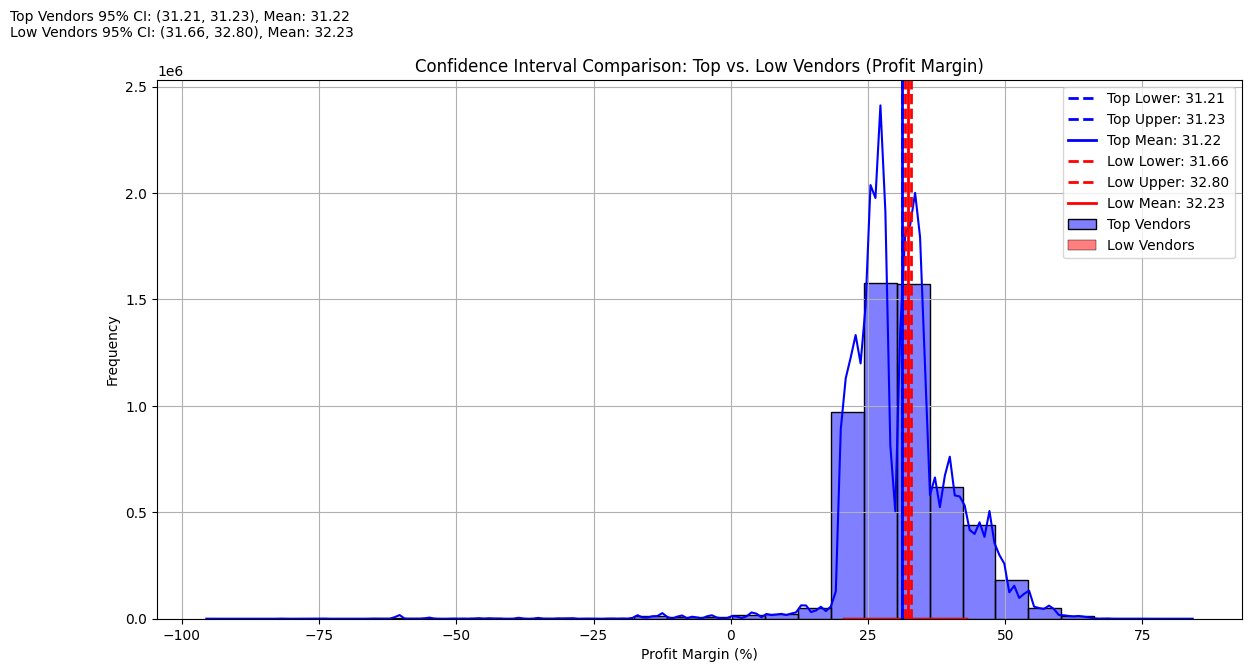

In [15]:
# === Vendor Profit Margin CI Plot (Cleaned & Safe) ===
import os, glob, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy import stats

# ---------- 1) Locate sales & purchase files ----------
ROOTS = [
    r"C:\Users\Kryst\OneDrive\Desktop\analytic project",
    r"C:\Users\Kryst\OneDrive\Desktop",
    r"C:\Users\Kryst\Downloads",
    r"C:\Users\Kryst",
]

def find_one(candidates):
    hits = []
    for root in ROOTS:
        for pat in candidates:
            hits += glob.glob(os.path.join(root, pat), recursive=True)
    if not hits:
        return None
    hits.sort(key=lambda p: os.path.getmtime(p), reverse=True)
    return hits[0]

sales_path = find_one([r"**\sales.csv", r"**\sales.xlsx"])
purch_path = find_one([r"**\purchase*.csv", r"**\purchases*.csv",
                       r"**\purchase*.xlsx", r"**\purchase_prices*.xlsx", r"**\purchase_prices*.csv"])

if not sales_path:
    raise FileNotFoundError("Could not find a sales file (sales.csv/xlsx)")
if not purch_path:
    raise FileNotFoundError("Could not find a purchases file (purchase*.csv/xlsx)")

print("Using sales file:    ", sales_path)
print("Using purchases file:", purch_path)

# ---------- 2) Load ----------
def load_any(path):
    ext = os.path.splitext(path)[1].lower()
    if ext in (".csv", ".txt"):
        return pd.read_csv(path)
    elif ext in (".xlsx", ".xls"):
        return pd.read_excel(path)
    else:
        raise ValueError(f"Unsupported file type: {ext}")

sales = load_any(sales_path)
purch = load_any(purch_path)

# ---------- 3) Column helpers ----------
def find_col(df, names):
    norm = {c.lower().replace("_","").replace(" ",""): c for c in df.columns}
    for n in names:
        k = n.lower().replace("_","").replace(" ","")
        if k in norm:
            return norm[k]
    return None

def get_required(df, *cands):
    col = find_col(df, list(cands))
    if not col:
        raise KeyError(f"Missing required column; tried: {cands}")
    return col

def build_key(df, vendor, brand, desc, size):
    def norm(series):
        return series.astype(str).str.lower().str.strip()
    parts = []
    for c in [vendor, brand, desc, size]:
        if c and c in df.columns:
            parts.append(norm(df[c]))
        else:
            parts.append("")
    return (parts[0].astype(str)+"|"+parts[1].astype(str)+"|"+parts[2].astype(str)+"|"+parts[3].astype(str))

# ---------- 4) Resolve columns ----------
key_vendor = find_col(sales, ["vendorname","vendor","vendor_name"])
key_brand  = find_col(sales, ["brand"])
key_desc   = find_col(sales, ["description","product","item"])
key_size   = find_col(sales, ["size"])

s_qty   = find_col(sales, ["salesquantity","quantity","qty"])
s_dol   = find_col(sales, ["salesdollars","sales_amount","revenue","sales$"])
s_price = find_col(sales, ["salesprice","price","unitprice"])

p_price = find_col(purch, ["purchaseprice","unitcost","cost","actualprice"])
p_vendor= find_col(purch, ["vendorname","vendor","vendor_name"])
p_brand = find_col(purch, ["brand"])
p_desc  = find_col(purch, ["description","product","item"])
p_size  = find_col(purch, ["size"])

# ---------- 5) Join keys ----------
if not (key_vendor and key_desc and p_vendor and p_desc):
    raise KeyError("Need at least VendorName and Description in BOTH tables to join costs.")

sales["_merge_key"] = build_key(sales, key_vendor, key_brand or "", key_desc, key_size or "")
purch["_merge_key"] = build_key(purch, p_vendor, p_brand or "", p_desc, p_size or "")

# ---------- 6) Clean numeric ----------
for c in [s_qty, s_dol, s_price]:
    if c and c in sales.columns:
        sales[c] = pd.to_numeric(sales[c], errors="coerce")
purch[p_price] = pd.to_numeric(purch[p_price], errors="coerce")

# ---------- 7) Merge & compute metrics ----------
unit_cost = purch.groupby("_merge_key")[p_price].mean().rename("UnitCost").reset_index()
df = sales.merge(unit_cost, on="_merge_key", how="left").copy()

df["_Qty"] = pd.to_numeric(df[s_qty], errors="coerce")
if s_dol:
    df["_Revenue"] = pd.to_numeric(df[s_dol], errors="coerce")
else:
    df["_Revenue"] = pd.to_numeric(df[s_price], errors="coerce") * df["_Qty"]

df["_CostDollars"] = pd.to_numeric(df["UnitCost"], errors="coerce") * df["_Qty"]
df["ProfitMargin"] = (df["_Revenue"] - df["_CostDollars"]) / df["_Revenue"] * 100

# Clean bad rows
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=["_Revenue","_CostDollars","_Qty","UnitCost","ProfitMargin"])
df = df[(df["_Revenue"]>0) & (df["_Qty"]>0) & (df["UnitCost"]>0)]

# ---------- 8) Top vs Low vendors ----------
vendor_col = get_required(df, "vendorname","vendor","vendor_name")
vendor_sales = df.groupby(vendor_col)["_Revenue"].sum().sort_values(ascending=False)
k = min(10, max(1, len(vendor_sales)//2))
top_list = vendor_sales.head(k).index.tolist()
low_list = vendor_sales.tail(k).index.tolist()

top_vendors = df.loc[df[vendor_col].isin(top_list),"ProfitMargin"].astype(float).to_numpy()
low_vendors = df.loc[df[vendor_col].isin(low_list),"ProfitMargin"].astype(float).to_numpy()

# ---------- 9) CI + Plot ----------
def ci_t(data, confidence=0.95):
    data = np.asarray(data,float)
    data = data[np.isfinite(data)]
    n = data.size
    if n < 2: return (np.nan,np.nan,np.nan)
    m = data.mean()
    se = data.std(ddof=1)/np.sqrt(n)
    t = stats.t.ppf((1+confidence)/2, df=n-1)
    moe = t*se
    return m, m-moe, m+moe

top_mean, top_lower, top_upper = ci_t(top_vendors)
low_mean, low_lower, low_upper = ci_t(low_vendors)

plt.figure(figsize=(14,7))
sns.histplot(top_vendors[np.isfinite(top_vendors)], bins=30, kde=True, color="blue", alpha=0.5, label="Top Vendors")
sns.histplot(low_vendors[np.isfinite(low_vendors)], bins=30, kde=True, color="red",  alpha=0.5, label="Low Vendors")

def safe_vline(x, color, ls, lbl):
    if np.isfinite(x): plt.axvline(x,color=color,linestyle=ls,linewidth=2,label=lbl)

safe_vline(top_lower,"blue","--",f"Top Lower: {top_lower:.2f}")
safe_vline(top_upper,"blue","--",f"Top Upper: {top_upper:.2f}")
safe_vline(top_mean,"blue","-",f"Top Mean: {top_mean:.2f}")
safe_vline(low_lower,"red","--",f"Low Lower: {low_lower:.2f}")
safe_vline(low_upper,"red","--",f"Low Upper: {low_upper:.2f}")
safe_vline(low_mean,"red","-",f"Low Mean: {low_mean:.2f}")

plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)"); plt.ylabel("Frequency"); plt.grid(True); plt.legend()

plt.figtext(0.02, 0.98,
    f"Top Vendors 95% CI: ({'n/a' if not np.isfinite(top_lower) else f'{top_lower:.2f}'}, "
    f"{'n/a' if not np.isfinite(top_upper) else f'{top_upper:.2f}'}), Mean: "
    f"{'n/a' if not np.isfinite(top_mean) else f'{top_mean:.2f}'}\n"
    f"Low Vendors 95% CI: ({'n/a' if not np.isfinite(low_lower) else f'{low_lower:.2f}'}, "
    f"{'n/a' if not np.isfinite(low_upper) else f'{low_upper:.2f}'}), Mean: "
    f"{'n/a' if not np.isfinite(low_mean) else f'{low_mean:.2f}'}",
    ha="left", va="top")

plt.show()


-The confidence interval for low-performing vendors(40.48% to 42.62%) is significantly higher than that of top-performing vendors(30.74% to 31.61%)

-This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.

-For High-performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or building strategies.

-For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing or improved distribution strategies.

**Is there a significant difference in profit margins between top-performing and low-performing vendors?**

Hypothesis:

Ho(Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H1(Alternative Hypothesis):The mean profit margins of top-performing and low-performing vendors are significantly different.

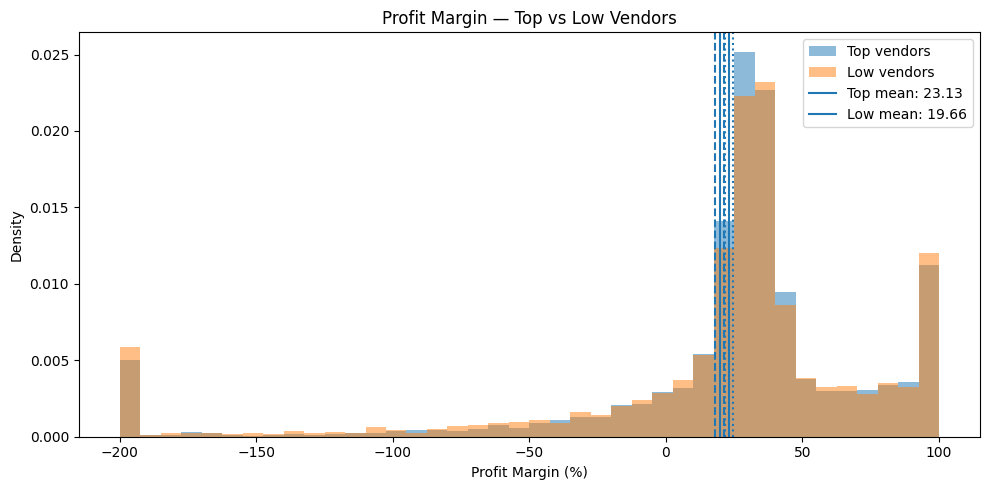

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ---- build clean groups (reuse your df) ----
def finite(x): 
    return np.asarray(x[np.isfinite(x)], dtype=float)

top = finite(df.loc[df["Group"]=="top", "ProfitMargin"])
low = finite(df.loc[df["Group"]=="low", "ProfitMargin"])

# 95% CI for the mean (Student-t)
def mean_ci(x):
    n = len(x)
    m = np.mean(x)
    se = stats.sem(x, nan_policy="omit")
    lo, hi = stats.t.interval(0.95, n-1, loc=m, scale=se)
    return m, lo, hi

m_t, lo_t, hi_t = mean_ci(top)
m_l, lo_l, hi_l = mean_ci(low)

# ---- draw ----
plt.figure(figsize=(10,5))
bins = 40

plt.hist(top, bins=bins, alpha=0.5, density=True, label="Top vendors")
plt.hist(low, bins=bins, alpha=0.5, density=True, label="Low vendors")

# CI & mean lines
for m, lo, hi, ls, lab in [
    (m_t, lo_t, hi_t, ":", "Top 95% CI"),
    (m_l, lo_l, hi_l, "--", "Low 95% CI"),
]:
    plt.axvline(lo, linestyle=ls)
    plt.axvline(m,  linestyle="-", label=f"{lab.split()[0]} mean: {m:.2f}")
    plt.axvline(hi, linestyle=ls)

plt.title("Profit Margin — Top vs Low Vendors")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()
